<h2 style="color:#90caf9; border-bottom: 2px solid #90caf9;">
Predictive Maintenance for Aircraft Engines
</h2>

<details>
<summary style="font-size:16px; color:#90caf9;"><b>▼ Expand for full project details</b></summary>

<br>

<p><b style="color:#ffcc80;">Project Overview:</b></p>
<p style="font-size: 14px;">
Our intelligent predictive maintenance system utilizes NASA's Turbofan Engine Degradation Simulation Dataset (CMAPSS) to forecast engine failures. By analyzing sensor data patterns, we predict the Remaining Useful Life (RUL) of turbofan engines, enabling:
</p>
<ul style="font-size: 14px;">
  <li>Proactive maintenance scheduling</li>
  <li>30–50% reduction in unplanned downtime</li>
  <li>Optimal spare parts inventory management</li>
  <li>Enhanced flight safety metrics</li>
</ul>

<p><b style="color:#ffcc80;">Dataset Structure:</b></p>
<ol style="font-size: 14px;">
  <li><b>Engine Metadata:</b>
    <ul>
      <li><code>unit_number</code>: Unique engine identifier</li>
      <li><code>time_cycles</code>: Operational cycles elapsed</li>
    </ul>
  </li>
  <li><b>Operational Settings:</b>
    <ul>
      <li><code>altitude</code>, <code>mach_number</code>, <code>throttle_resolver_angle</code></li>
    </ul>
  </li>
  <li><b>Thermal Monitoring System:</b>
    <ul>
      <li><u>Temperature Sensors:</u>
        <ul>
          <li><code>fan_inlet_temp</code>: Fan inlet temperature (°C)</li>
          <li><code>LPC_outlet_temp</code>: Low Pressure Compressor exit temp (°C)</li>
          <li><code>HPC_outlet_temp</code>, <code>LPT_outlet_temp</code>, <code>compressor_discharge_temp</code>, <code>HPT_outlet_temp</code></li>
        </ul>
      </li>
    </ul>
  </li>
  <li><b>Pressure Analysis System:</b>
    <ul>
      <li><u>Pressure Sensors:</u> <code>fan_inlet_pressure</code>, <code>bypass_duct_pressure</code>, <code>HPC_outlet_pressure</code>, etc.</li>
    </ul>
  </li>
  <li><b>Mechanical Performance System:</b>
    <ul>
      <li><u>Speed & Rotation Sensors:</u> <code>physical_fan_speed</code>, <code>corrected_core_speed</code></li>
    </ul>
  </li>
</ol>

<h3 style="color:#ffcc80;">Operational Context:</h3>
<ul style="font-size: 14px;">
  <li>Temperatures in °C</li>
  <li>Pressure in PSI</li>
  <li>Speed in RPM</li>
</ul>

<h3 style="color:#d32f2f;">Diagnostic Value:</h3>
<ul style="font-size: 14px;">
  <li><b style="color:#e53935;">High temperature deviations</b> → cooling system issues</li>
  <li><b style="color:#e53935;">Pressure anomalies</b> → airflow blockages</li>
  <li><b style="color:#e53935;">Speed fluctuations</b> → mechanical wear</li>
  <li><b style="color:#e53935;">Ratio variations</b> → combustion problems</li>
</ul>

<p><b style="color:#0d47a1;">Machine Learning Pipeline:</b></p>
<ol style="font-size: 14px;">
  <li><b>Data Preprocessing:</b> normalization, fusion, trend extraction</li>
  <li><b>Core Algorithms:</b> LSTM, Survival Analysis, Gradient Boosting</li>
  <li><b>Output:</b> RUL prediction, failure probability, alert thresholds</li>
</ol>

<h4 style="color:green;">✓ Key Benefits:</h4>
<ul style="font-size: 14px;">
  <li>25–40% maintenance cost reduction</li>
  <li>60% improvement in early fault detection</li>
  <li>Real-time monitoring compatibility</li>
  <li>Adaptable to various engine types</li>
</ul>

<br>

<img src="./images/engine.png" alt="Engine Image" style="max-width: 100%;">

</details>


# 📝Check List

<details>
<summary><b>Click to expand</b></summary>

1. [📚 Importing Libraries](#importing-libraries)  
2. [📂 Loading Data](#loading-data)  
3. [🔍 Discovering Data](#discovering-data)  
   - [❓ Missing Values](#missing-values)  
   - [🔄 Duplicates](#duplicates)  
4. [📊 EDA](#eda)  
   - [⭕ Categorical Columns](#categorical-columns)  
   - [🔢 Numerical Columns](#numerical-columns)  
   - [⏰ Time Columns](#time-columns)  
5. [🛠️ Feature Engineering](#feature-engineering)  
   - [⚖️ Scaling](#scaling)  
   - [🗑️ Dropping Unimportant Columns](#dropping-unimportant-columns-1)  
   - [🔬 PCA](#pca)  
6. [📂 Splitting Data](#splitting-data)  
7. [⚙️ Initialize estimators and hyperparameters](#initialize-estimators-and-hyperparameters)  
8. [📅 Grid Search CV](#grid-search-cv)  
9. [🎯 Randomized Search CV](#randomized-search-cv)  
10. [📈 The best Model Training](#the-best-model-training)  
11. [💾 Saving the model](#saving-the-model)  
12. [🧪 Test Data Preparation](#test-data-preparation)  
13. [🔄 Load the Model and Predict the Test Data](#load-the-model-and-predict-the-test-data)  

</details>


# 📚 Importing Libraries <a name="importing-libraries"></a>

In [1]:
# MLflow Setup: This block sets up tracking for experiment management
import mlflow
from mlflow.models.signature import infer_signature

In [2]:

# Create a new MLflow experiment
experiment_id = mlflow.create_experiment(
    name="Aircraft_Engine_RUL_Prediction",  # Name of the experiment
    artifact_location="./mlruns/Aircraft_Engine_RUL_Prediction_artifacts",  # Updated location
    tags={"env": "dev", "version": "1.0.0"}  # Metadata tags for the experiment
)


In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [4]:
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor

In [5]:
# Splitting the data into training and test sets
from sklearn.preprocessing import StandardScaler
from scipy.stats import uniform, randint
from sklearn.ensemble import GradientBoostingRegressor, RandomForestRegressor
from xgboost import XGBRegressor
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV, train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score, roc_auc_score
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report


In [6]:
from sklearn.pipeline import Pipeline
import joblib

[📝Check List](#Check-List)

# 📂 Loading Data <a name="loading-data"></a>

In [115]:
# define column names for easy indexing
column_names = ['unit_number', 'time_cycles', 'op_setting_1', 'op_setting_2', 'op_setting_3'] + [f'sensor_{i}' for i in range(1, 22)]

# Load Data
train_df = pd.read_csv('./data/train_FD001.txt', sep='\s+', header=None, names=column_names)
test_df = pd.read_csv('./data/test_FD001.txt', sep='\s+', header=None, names=column_names)

# Display first 3 rows
train_df.head(3)


,unit_number,time_cycles,op_setting_1,op_setting_2,op_setting_3,sensor_1,sensor_2,sensor_3,sensor_4,sensor_5,...,sensor_12,sensor_13,sensor_14,sensor_15,sensor_16,sensor_17,sensor_18,sensor_19,sensor_20,sensor_21
0,1,1,-0.0007,-0.0004,100.0,518.67,641.82,1589.70,1400.60,14.62,...,521.66,2388.02,8138.62,8.4195,0.03,392,2388,100.0,39.06,23.4190
1,1,2,0.0019,-0.0003,100.0,518.67,642.15,1591.82,1403.14,14.62,...,522.28,2388.07,8131.49,8.4318,0.03,392,2388,100.0,39.00,23.4236
2,1,3,-0.0043,0.0003,100.0,518.67,642.35,1587.99,1404.20,14.62,...,522.42,2388.03,8133.23,8.4178,0.03,390,2388,100.0,38.95,23.3442


In [116]:
# calculate and add RUL(Remaining Useful Life) to the train dataset.
def calculate_rul(df):
    # Group by engine ID and find max cycles for each engine
    max_cycles = df.groupby('unit_number')['time_cycles'].max().reset_index()
    max_cycles.columns = ['unit_number', 'max_cycles']

    # Merge with original data to compute RUL
    df = df.merge(max_cycles, on='unit_number', how='left')
    df['RUL'] = df['max_cycles'] - df['time_cycles']

    # Drop the temporary column
    df.drop('max_cycles', axis=1, inplace=True)
    return df

# Apply to training data
train_df = calculate_rul(train_df)

[📝Check List](#Check-List)

# 🔍 Discovering Data <a name="discovering-data"></a>

In [9]:
train_df.shape

(20631, 27)

In [10]:
train_df.columns

Index(['unit_number', 'time_cycles', 'op_setting_1', 'op_setting_2',
       'op_setting_3', 'sensor_1', 'sensor_2', 'sensor_3', 'sensor_4',
       'sensor_5', 'sensor_6', 'sensor_7', 'sensor_8', 'sensor_9', 'sensor_10',
       'sensor_11', 'sensor_12', 'sensor_13', 'sensor_14', 'sensor_15',
       'sensor_16', 'sensor_17', 'sensor_18', 'sensor_19', 'sensor_20',
       'sensor_21', 'RUL'],
      dtype='object')

In [11]:
train_df.columns

Index(['unit_number', 'time_cycles', 'op_setting_1', 'op_setting_2',
       'op_setting_3', 'sensor_1', 'sensor_2', 'sensor_3', 'sensor_4',
       'sensor_5', 'sensor_6', 'sensor_7', 'sensor_8', 'sensor_9', 'sensor_10',
       'sensor_11', 'sensor_12', 'sensor_13', 'sensor_14', 'sensor_15',
       'sensor_16', 'sensor_17', 'sensor_18', 'sensor_19', 'sensor_20',
       'sensor_21', 'RUL'],
      dtype='object')

In [12]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20631 entries, 0 to 20630
Data columns (total 27 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   unit_number   20631 non-null  int64  
 1   time_cycles   20631 non-null  int64  
 2   op_setting_1  20631 non-null  float64
 3   op_setting_2  20631 non-null  float64
 4   op_setting_3  20631 non-null  float64
 5   sensor_1      20631 non-null  float64
 6   sensor_2      20631 non-null  float64
 7   sensor_3      20631 non-null  float64
 8   sensor_4      20631 non-null  float64
 9   sensor_5      20631 non-null  float64
 10  sensor_6      20631 non-null  float64
 11  sensor_7      20631 non-null  float64
 12  sensor_8      20631 non-null  float64
 13  sensor_9      20631 non-null  float64
 14  sensor_10     20631 non-null  float64
 15  sensor_11     20631 non-null  float64
 16  sensor_12     20631 non-null  float64
 17  sensor_13     20631 non-null  float64
 18  sensor_14     20631 non-nu

In [13]:
train_df['unit_number'].unique()

array([  1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,  13,
        14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,  26,
        27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,  39,
        40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  50,  51,  52,
        53,  54,  55,  56,  57,  58,  59,  60,  61,  62,  63,  64,  65,
        66,  67,  68,  69,  70,  71,  72,  73,  74,  75,  76,  77,  78,
        79,  80,  81,  82,  83,  84,  85,  86,  87,  88,  89,  90,  91,
        92,  93,  94,  95,  96,  97,  98,  99, 100], dtype=int64)

In [14]:
train_df['unit_number'] = train_df['unit_number'].astype('category')

In [15]:
train_df['unit_number'].unique()

[1, 2, 3, 4, 5, ..., 96, 97, 98, 99, 100]
Length: 100
Categories (100, int64): [1, 2, 3, 4, ..., 97, 98, 99, 100]

[📝Check List](#Check-List)

## ❓ Missing Values <a name="missing-values"></a>

In [16]:
train_df.isna().sum()

unit_number     0
time_cycles     0
op_setting_1    0
op_setting_2    0
op_setting_3    0
sensor_1        0
sensor_2        0
sensor_3        0
sensor_4        0
sensor_5        0
sensor_6        0
sensor_7        0
sensor_8        0
sensor_9        0
sensor_10       0
sensor_11       0
sensor_12       0
sensor_13       0
sensor_14       0
sensor_15       0
sensor_16       0
sensor_17       0
sensor_18       0
sensor_19       0
sensor_20       0
sensor_21       0
RUL             0
dtype: int64

[📝Check List](#Check-List)

## 🔄 Duplicates <a name="duplicates"></a>

In [17]:
train_df.duplicated().sum()

0

[📝Check List](#Check-List)

# 📊 EDA <a name="eda"></a>

## ⭕ Categorical Columns <a name="categorical-columns"></a>

In [18]:
train_df['unit_number'].nunique()

100

In [19]:
train_df['unit_number'].value_counts()

unit_number
69    362
92    341
96    336
67    313
83    293
     ... 
24    147
57    137
70    137
91    135
39    128
Name: count, Length: 100, dtype: int64

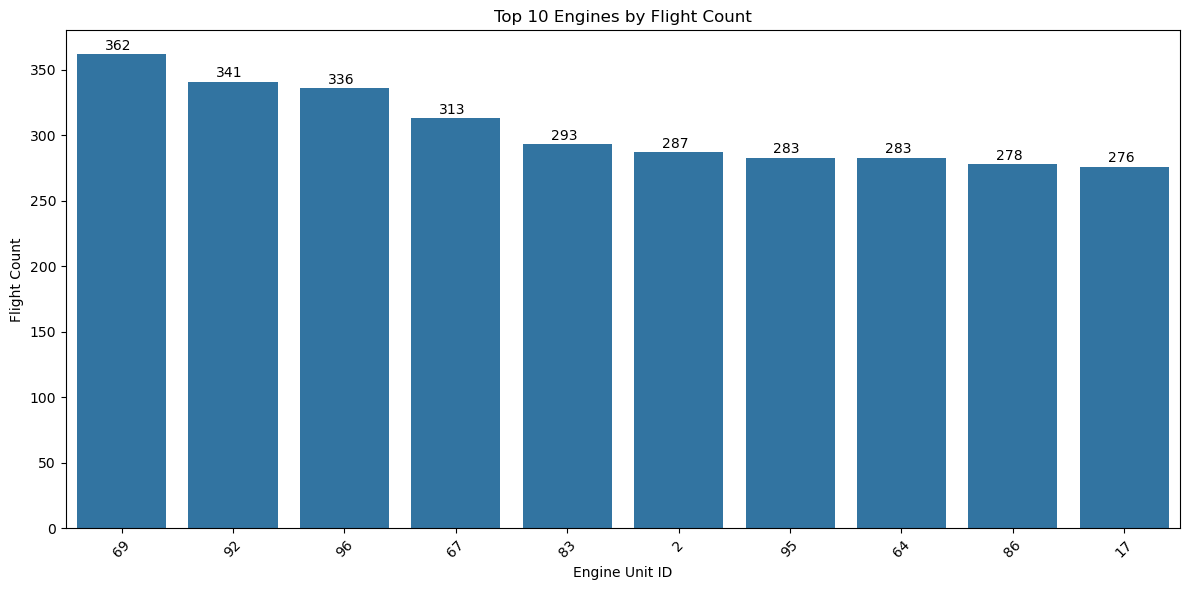

In [20]:
# Plotting Count Plot for first 10 engines
plt.figure(figsize=(12,6))
ax = sns.countplot(data=train_df, x='unit_number', order=train_df['unit_number'].value_counts().index[:10])

# Set labels and title for the plot
plt.xlabel('Engine Unit ID')
plt.ylabel('Flight Count')
plt.title('Top 10 Engines by Flight Count')
plt.xticks(rotation=45)

# Display numbers on the plot
for p in ax.patches:
    ax.annotate(int(p.get_height()), (p.get_x()+0.25, p.get_height()+1), va='bottom', color='black')

# Display the plot
plt.tight_layout()
plt.show()

In [21]:
top_5_units = train_df['unit_number'].value_counts().head(5).index.tolist()
top_5_data = train_df[train_df['unit_number'].isin(top_5_units)]
top_5_data['unit_number'].unique()

[67, 69, 83, 92, 96]
Categories (100, int64): [1, 2, 3, 4, ..., 97, 98, 99, 100]

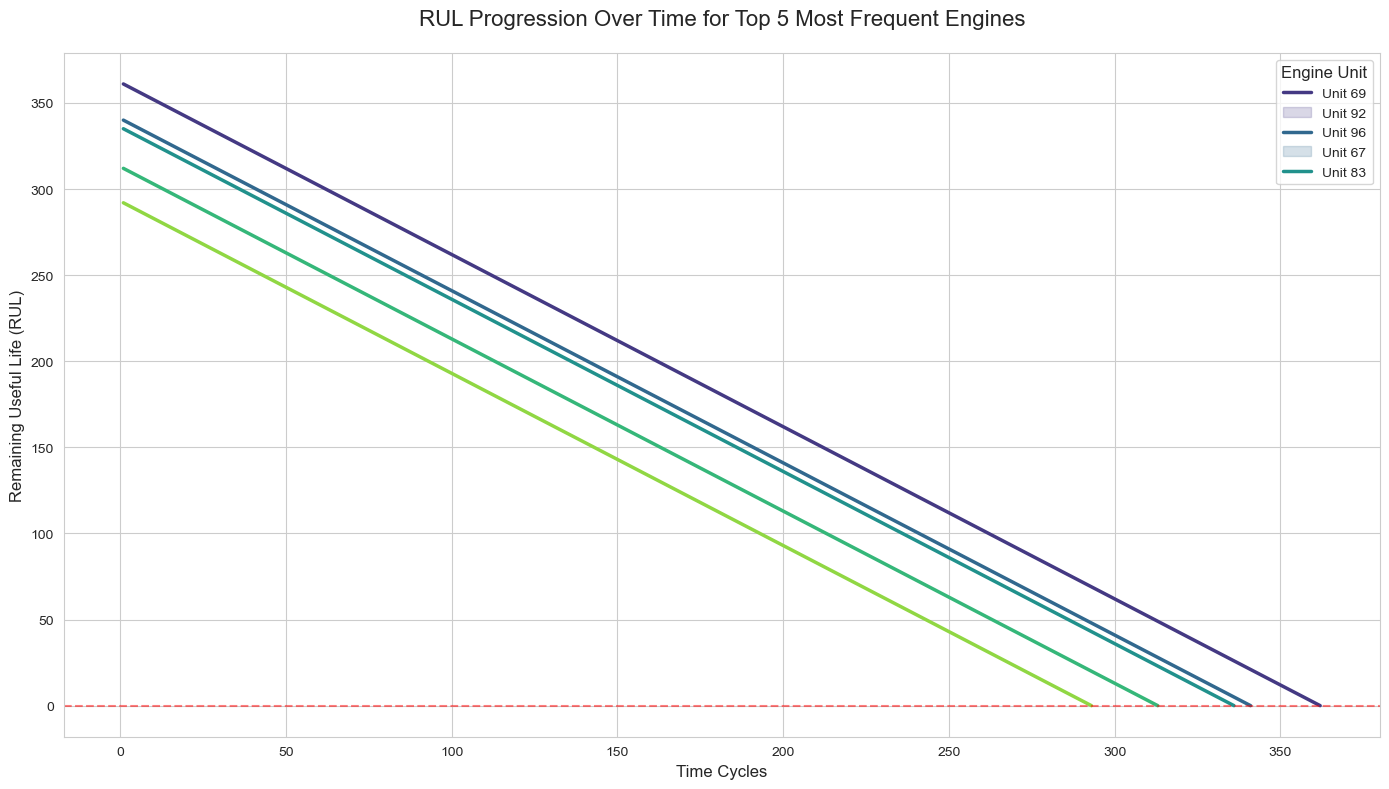

In [22]:
plt.figure(figsize=(14, 8))
sns.set_style("whitegrid")

# Get the top 5 units explicitly
top_5_units = train_df['unit_number'].value_counts().head(5).index.tolist()
top_5_data = train_df[train_df['unit_number'].isin(top_5_units)]

# Plot with legend control
ax = sns.lineplot(data=top_5_data, x='time_cycles', y='RUL', hue='unit_number',
                 palette='viridis', linewidth=2.5,
                 hue_order=top_5_units)  # This ensures only these 5 appear in legend

# Customize legend
plt.legend(title='Engine Unit', title_fontsize=12,
           labels=[f'Unit {i}' for i in top_5_units])

# Add titles and formatting
plt.title('RUL Progression Over Time for Top 5 Most Frequent Engines', fontsize=16, pad=20)
plt.xlabel('Time Cycles', fontsize=12)
plt.ylabel('Remaining Useful Life (RUL)', fontsize=12)

# Add failure threshold line
plt.axhline(y=0, color='red', linestyle='--', alpha=0.5)

plt.tight_layout()
plt.show()

[📝Check List](#Check-List)

## 🔢 Numerical Columns <a name="numerical-columns"></a>

In [23]:
numeric_cols = train_df.select_dtypes(include=['float32', 'float64', 'int16', 'int32', 'int64']).columns
numeric_cols

Index(['time_cycles', 'op_setting_1', 'op_setting_2', 'op_setting_3',
       'sensor_1', 'sensor_2', 'sensor_3', 'sensor_4', 'sensor_5', 'sensor_6',
       'sensor_7', 'sensor_8', 'sensor_9', 'sensor_10', 'sensor_11',
       'sensor_12', 'sensor_13', 'sensor_14', 'sensor_15', 'sensor_16',
       'sensor_17', 'sensor_18', 'sensor_19', 'sensor_20', 'sensor_21', 'RUL'],
      dtype='object')

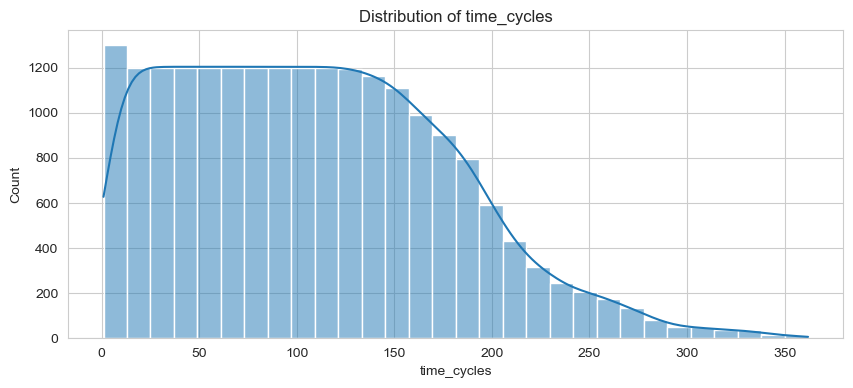

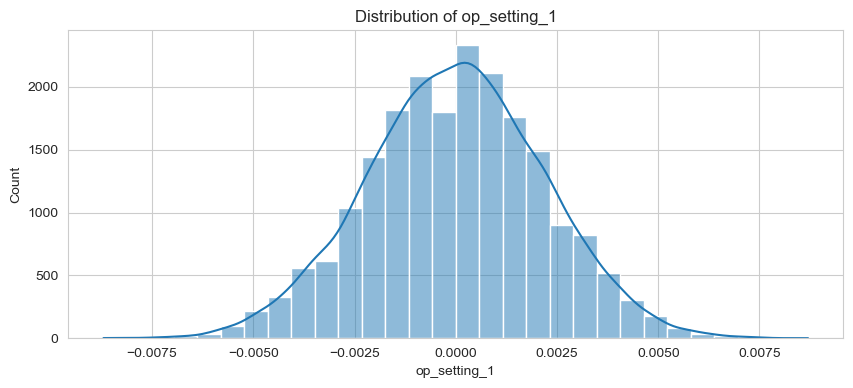

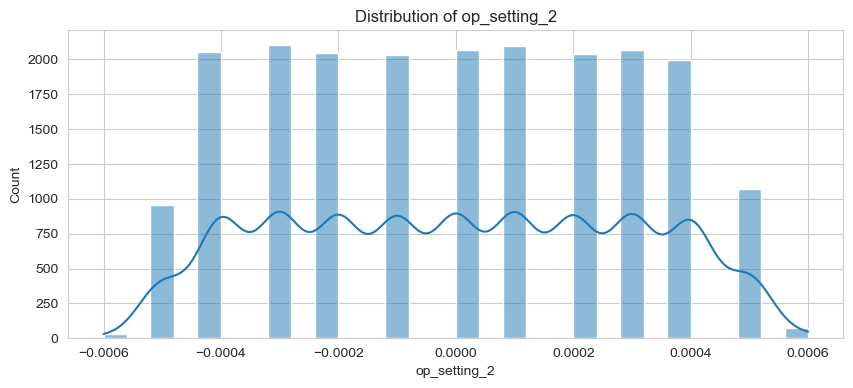

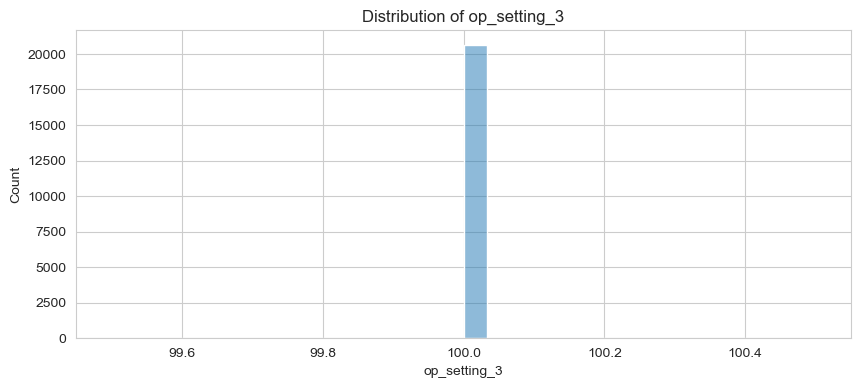

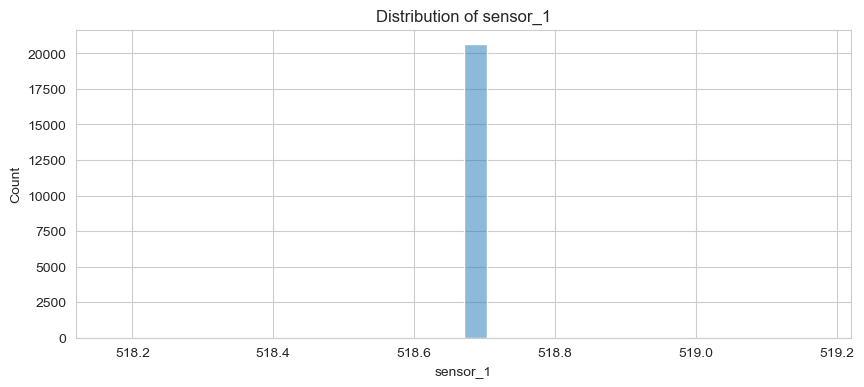

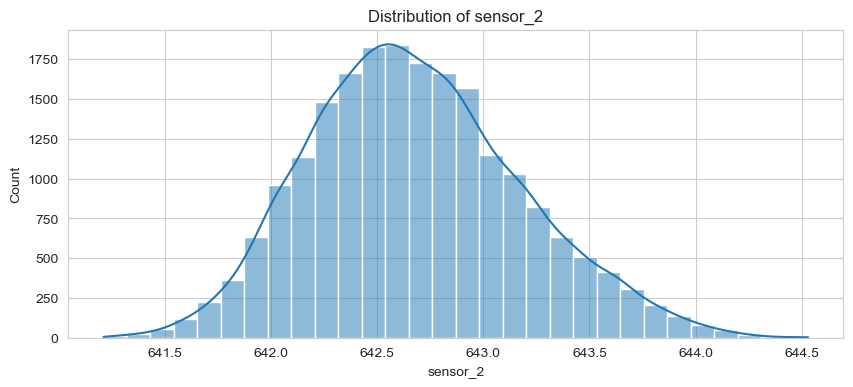

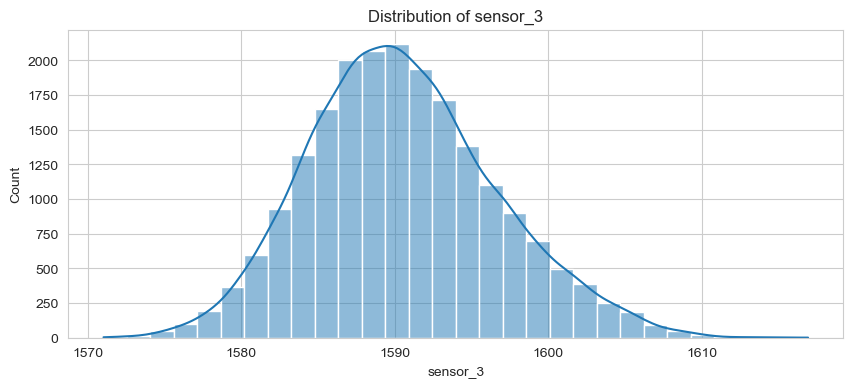

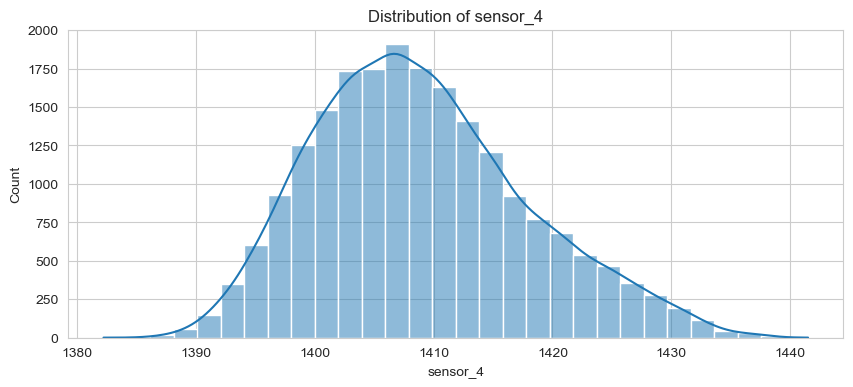

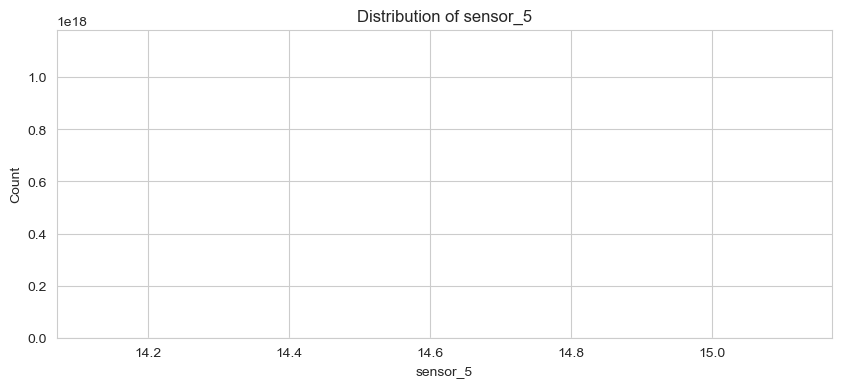

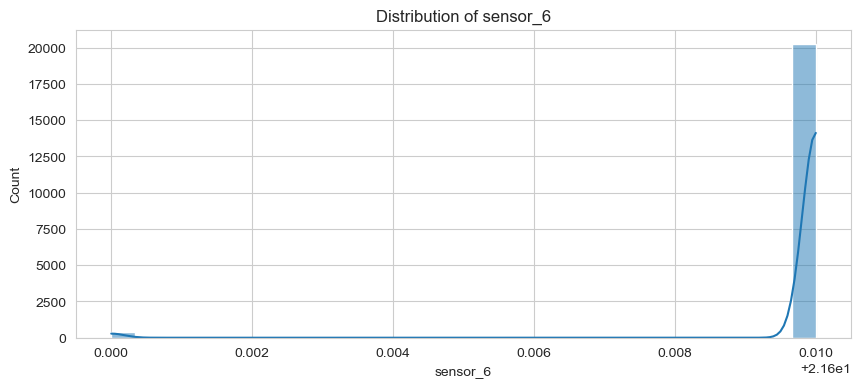

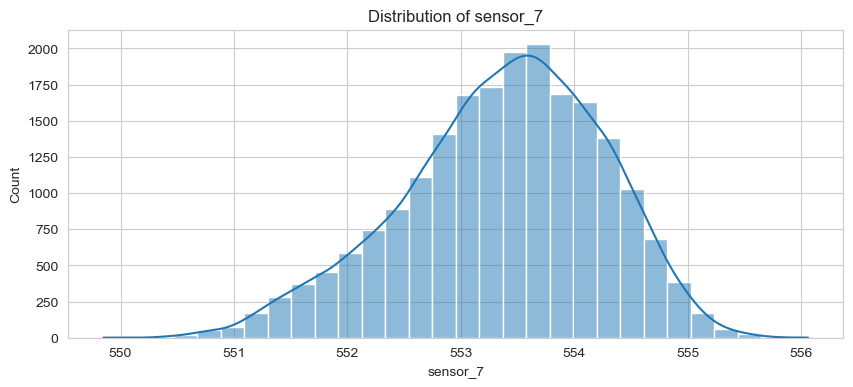

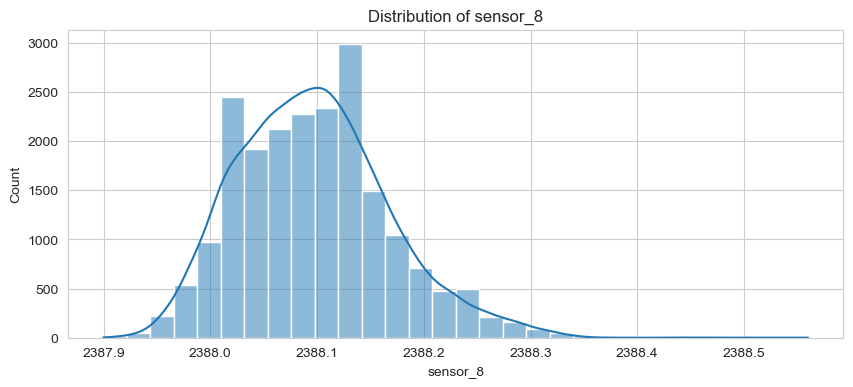

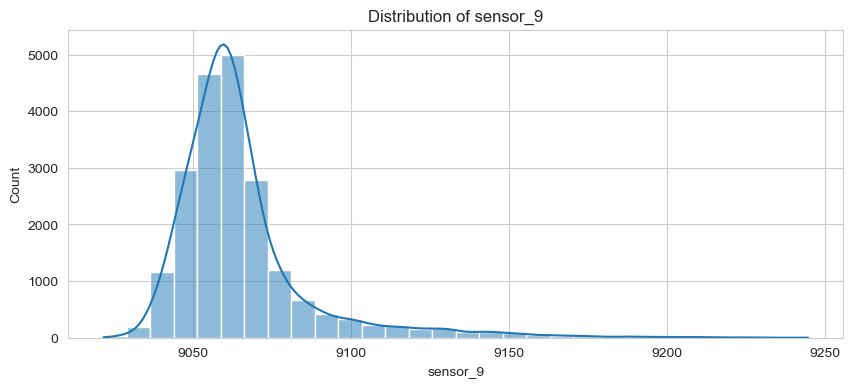

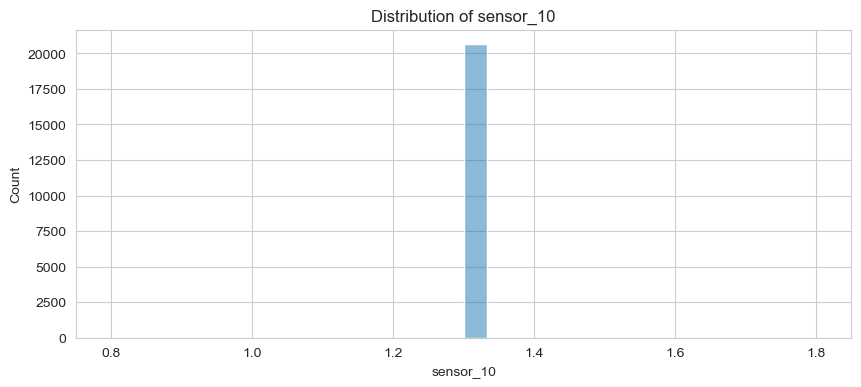

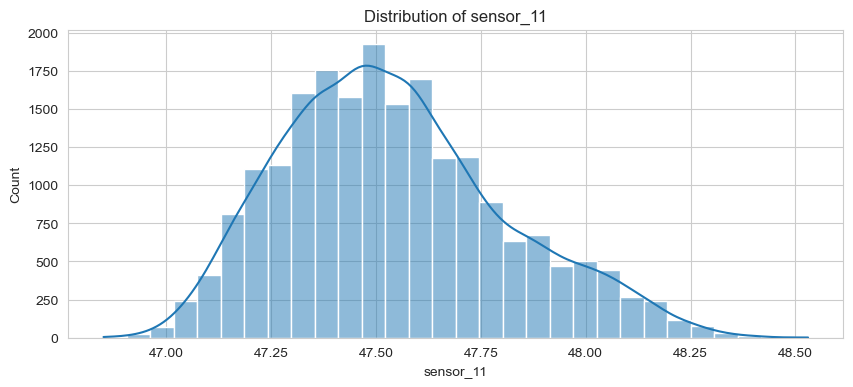

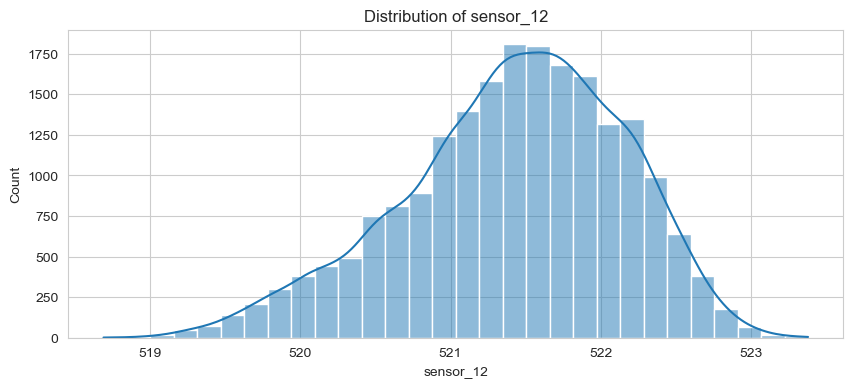

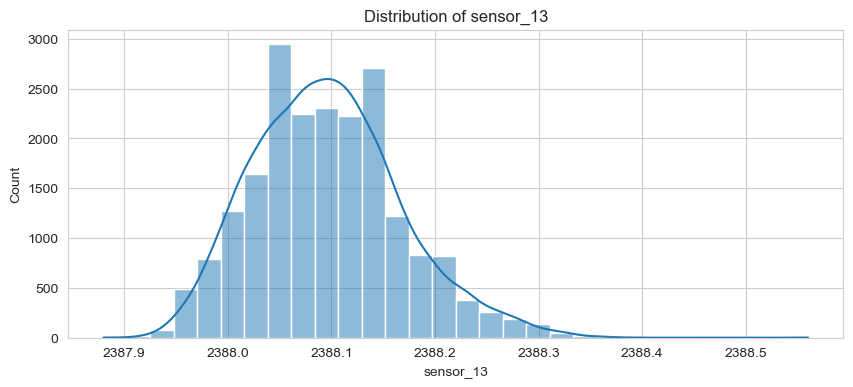

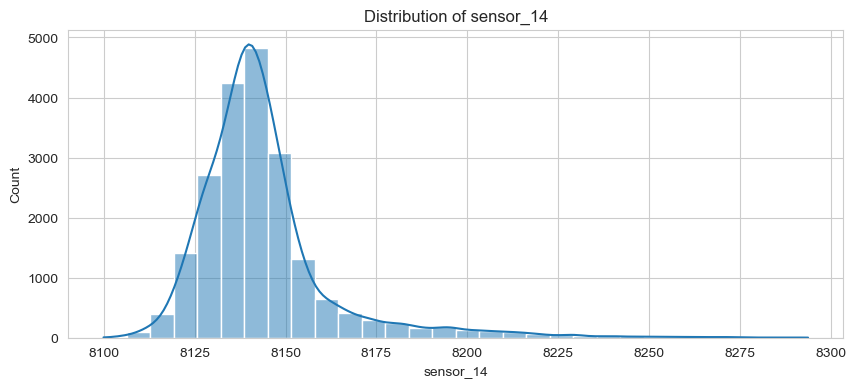

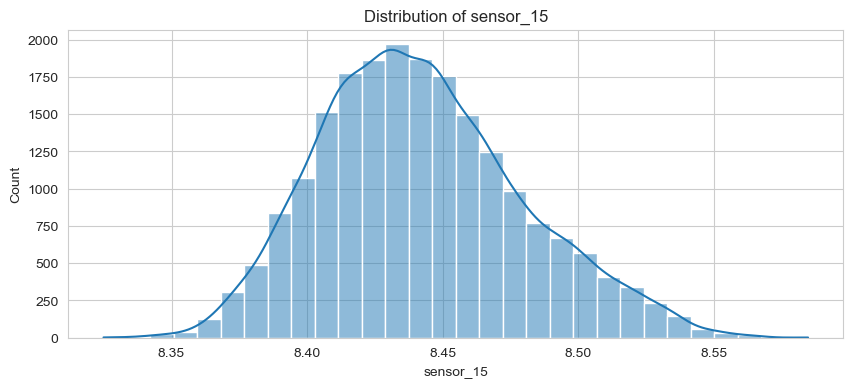

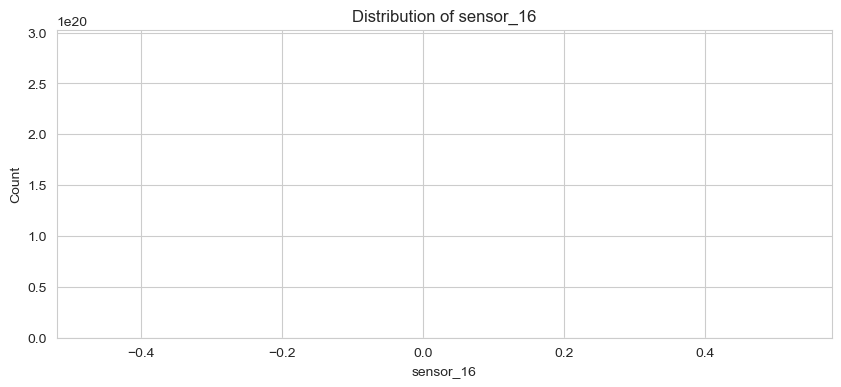

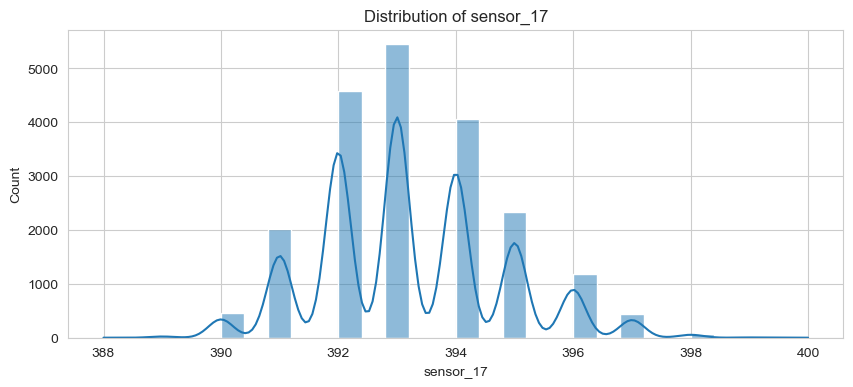

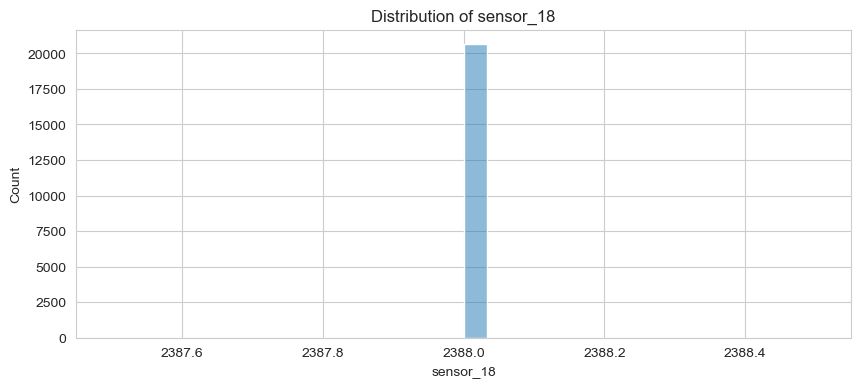

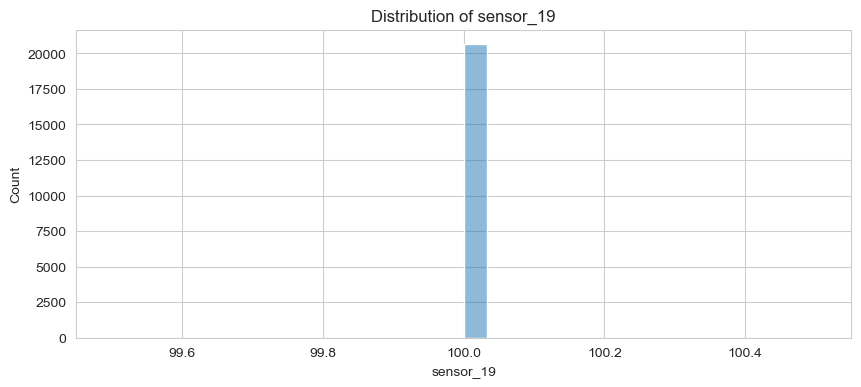

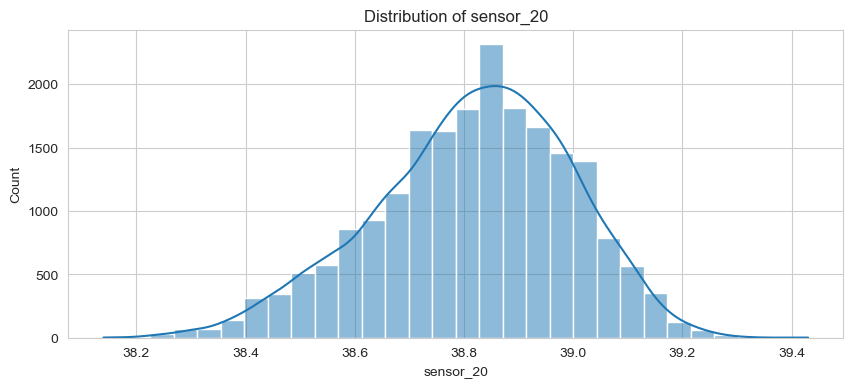

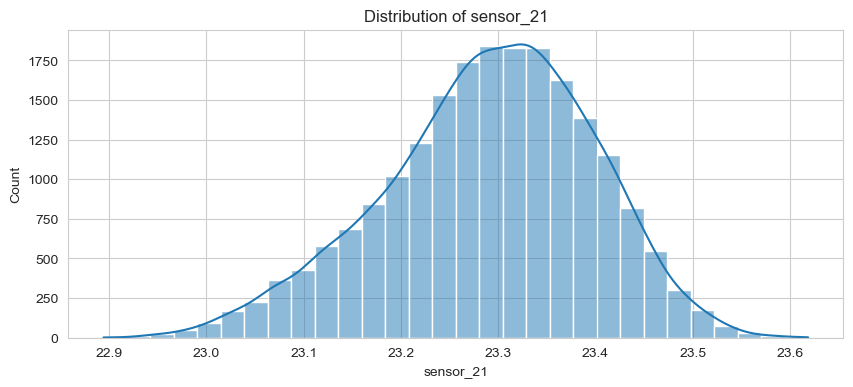

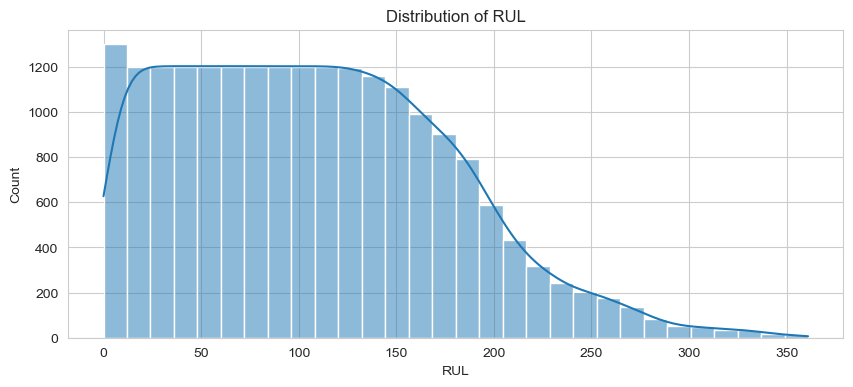

In [24]:
# Plotting Distribution for numerical columns
import matplotlib.pyplot as plt
import seaborn as sns

for col in numeric_cols:
    plt.figure(figsize=(10, 4))
    sns.histplot(train_df[col], kde=True, bins=30)
    plt.title(f'Distribution of {col}')
    plt.show()

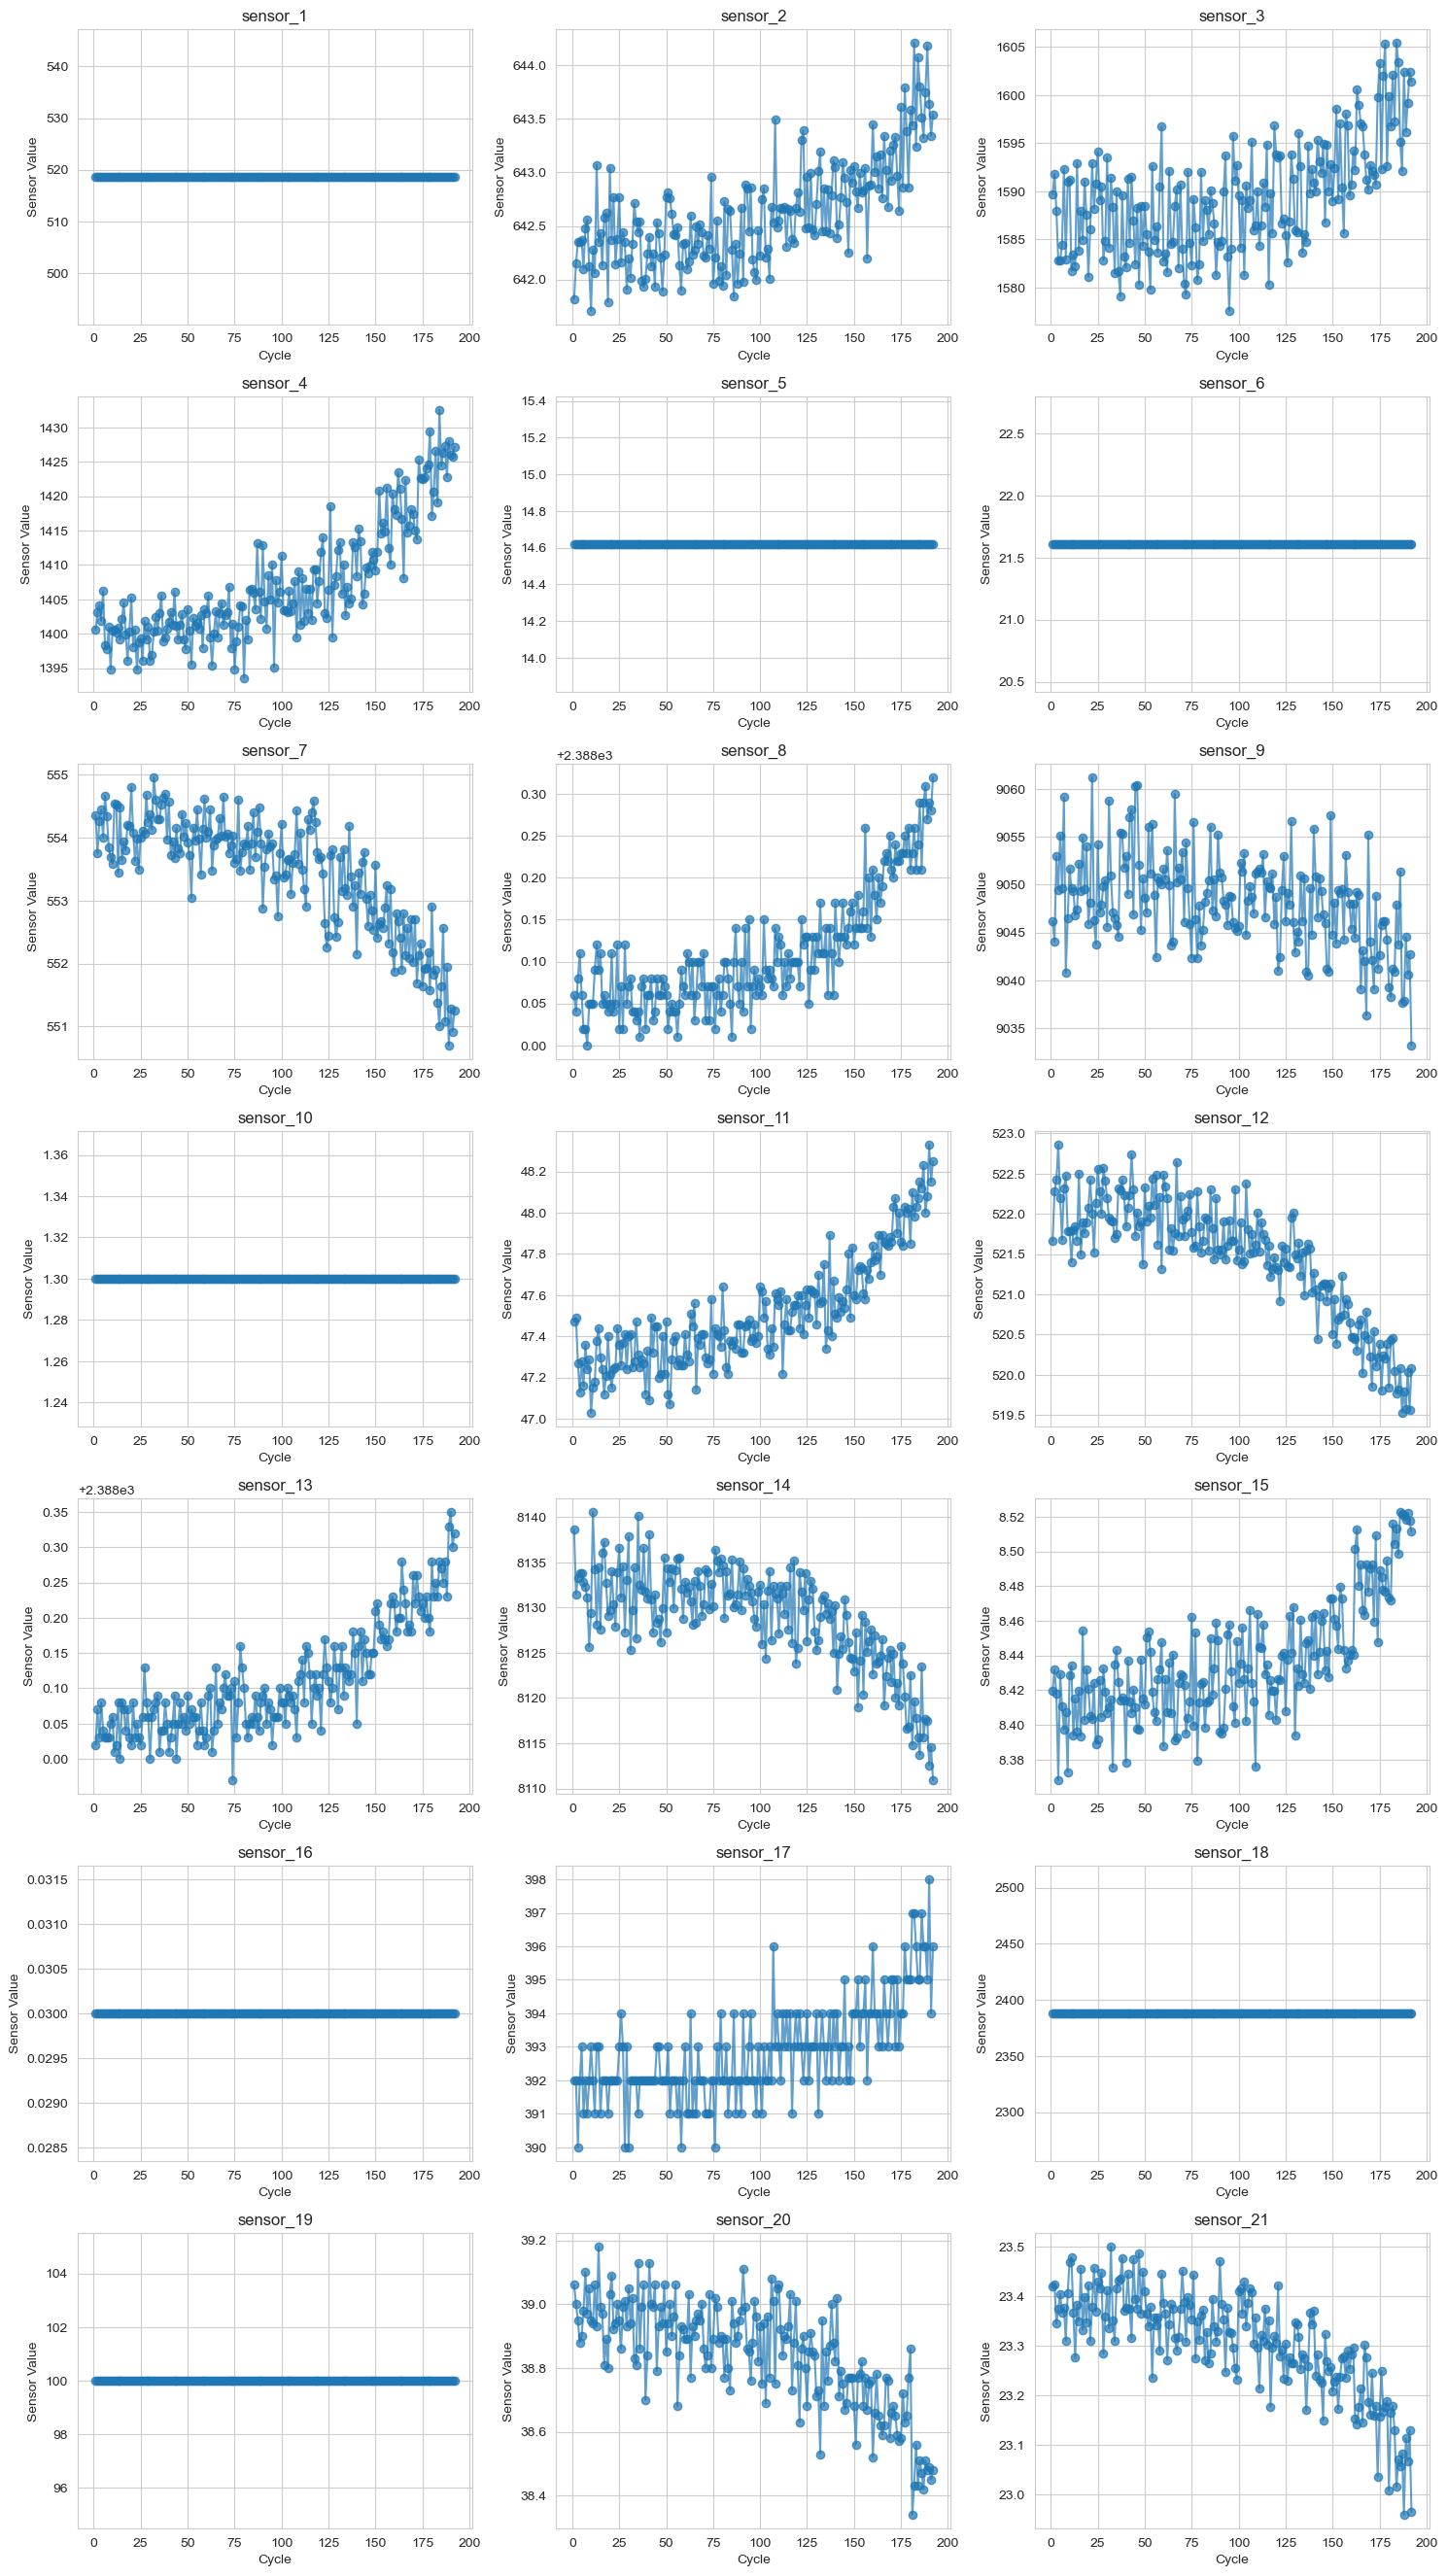

In [25]:
# Plot Sensors vs Cycles
# List of sensors you want to visualize
sensors = ['sensor_1', 'sensor_2', 'sensor_3', 'sensor_4',
       'sensor_5', 'sensor_6', 'sensor_7', 'sensor_8', 'sensor_9', 'sensor_10',
       'sensor_11', 'sensor_12', 'sensor_13', 'sensor_14', 'sensor_15',
       'sensor_16', 'sensor_17', 'sensor_18', 'sensor_19', 'sensor_20',
       'sensor_21']

# Select one engine (example: engine with ID = 1)
engine_id = 1
engine_data = train_df[train_df['unit_number'] == engine_id]

# Create subplots for all sensors
plt.figure(figsize=(15, 30))

for i, sensor in enumerate(sensors, 1):
    plt.subplot(len(sensors)//3 + 1, 3, i)
    plt.plot(engine_data['time_cycles'], engine_data[sensor], marker='o', linestyle='-', alpha=0.7)
    plt.title(sensor)
    plt.xlabel('Cycle')
    plt.ylabel('Sensor Value')
    plt.grid(True)

plt.tight_layout()
plt.show()

[📝Check List](#Check-List)

## ⏰ Time Columns <a name="time-columns"></a>

C:\Users\CM\AppData\Local\Temp\ipykernel_11720\2789607963.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  cycle_counts = train_df.groupby('unit_number')['time_cycles'].max()


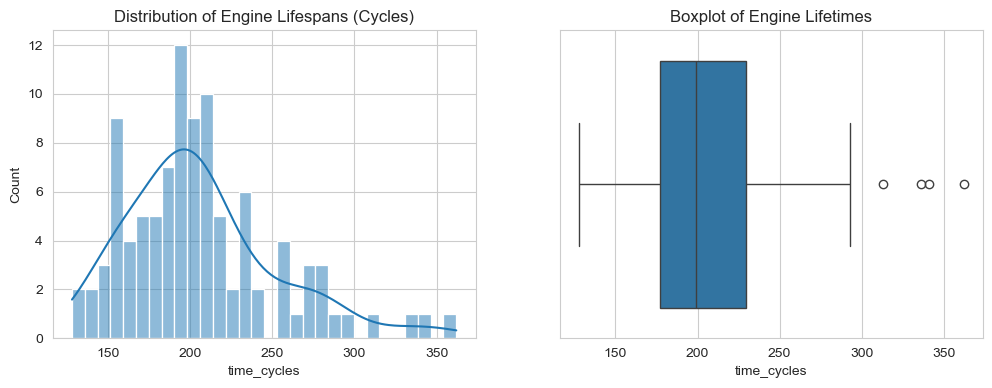

In [26]:
# Total cycles per engine
cycle_counts = train_df.groupby('unit_number')['time_cycles'].max()

plt.figure(figsize=(12, 4))
plt.subplot(121)
sns.histplot(cycle_counts, bins=30, kde=True)
plt.title('Distribution of Engine Lifespans (Cycles)')

plt.subplot(122)
sns.boxplot(x=cycle_counts)
plt.title('Boxplot of Engine Lifetimes')
plt.show()

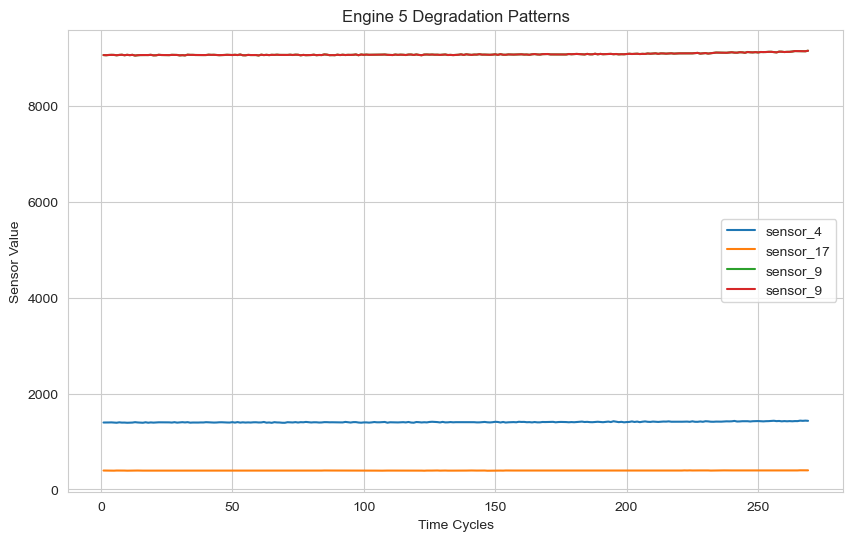

In [27]:
# Plot sensor trends for a random engine
engine_id = 5
engine_data = train_df[train_df['unit_number'] == engine_id]

plt.figure(figsize=(10, 6))
for sensor in ['sensor_4', 'sensor_17', 'sensor_9', 'sensor_9']:  # Key sensors from PCA
    plt.plot(engine_data['time_cycles'], engine_data[sensor], label=sensor)
plt.xlabel('Time Cycles')
plt.ylabel('Sensor Value')
plt.title(f'Engine {engine_id} Degradation Patterns')
plt.legend()
plt.show()

[📝Check List](#Check-List)

# 🛠️ Feature Engineering <a name="feature-engineering"></a>

## Rate Of Change (ROC)
- Absolute Rate of Change (Difference from previous cycle)
- Relative Change (Percentage change from previous cycle)
- Rolling Change over a window (Trend across multiple cycles)

In [29]:
train_copy_ROC = train_df.copy()
test_copy_ROC = test_df.copy()

In [30]:
def ROC(df, sensors, window_size):
    for sensor in sensors:
        # Absolute Rate of Change (Difference from previous cycle)
        df[f'{sensor}_rate_of_change'] = df.groupby('unit_number')[sensor].diff().reset_index(level=0, drop=True)

        # Relative Change (Percentage change from previous cycle)
        df[f'{sensor}_relative_change'] = df.groupby('unit_number')[sensor].pct_change().reset_index(level=0, drop=True)

        # Rolling Change over a window
        df[f'{sensor}_rolling_change_{window_size}'] = df.groupby('unit_number')[sensor].apply(
            lambda x: x.rolling(window=window_size, min_periods=1).apply(lambda y: y.iloc[-1] - y.iloc[0])
        ).reset_index(level=0, drop=True)

    # Convert categoricals to float before filling
    for col in df.columns:
        if pd.api.types.is_categorical_dtype(df[col]):
            df[col] = df[col].astype('float32')

    return df.fillna(0)


In [31]:
# add ROC columns
train_copy_ROC = ROC(train_copy_ROC , sensors , 15)
test_copy_ROC = ROC(test_copy_ROC , sensors , 15)

C:\Users\CM\AppData\Local\Temp\ipykernel_11720\3558014221.py:4: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df[f'{sensor}_rate_of_change'] = df.groupby('unit_number')[sensor].diff().reset_index(level=0, drop=True)
C:\Users\CM\AppData\Local\Temp\ipykernel_11720\3558014221.py:7: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df[f'{sensor}_relative_change'] = df.groupby('unit_number')[sensor].pct_change().reset_index(level=0, drop=True)
C:\Users\CM\AppData\Local\Temp\ipykernel_11720\3558014221.py:10: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pa

In [32]:
train_copy_ROC.shape

(20631, 90)

In [33]:
train_copy_ROC.head()


,unit_number,time_cycles,op_setting_1,op_setting_2,op_setting_3,sensor_1,sensor_2,sensor_3,sensor_4,sensor_5,...,sensor_18_rolling_change_15,sensor_19_rate_of_change,sensor_19_relative_change,sensor_19_rolling_change_15,sensor_20_rate_of_change,sensor_20_relative_change,sensor_20_rolling_change_15,sensor_21_rate_of_change,sensor_21_relative_change,sensor_21_rolling_change_15
0,1.0,1,-0.0007,-0.0004,100.0,518.67,641.82,1589.70,1400.60,14.62,...,0.0,0.0,0.0,0.0,0.00,0.000000,0.00,0.0000,0.000000,0.0000
1,1.0,2,0.0019,-0.0003,100.0,518.67,642.15,1591.82,1403.14,14.62,...,0.0,0.0,0.0,0.0,-0.06,-0.001536,-0.06,0.0046,0.000196,0.0046
2,1.0,3,-0.0043,0.0003,100.0,518.67,642.35,1587.99,1404.20,14.62,...,0.0,0.0,0.0,0.0,-0.05,-0.001282,-0.11,-0.0794,-0.003390,-0.0748
3,1.0,4,0.0007,0.0000,100.0,518.67,642.35,1582.79,1401.87,14.62,...,0.0,0.0,0.0,0.0,-0.07,-0.001797,-0.18,0.0297,0.001272,-0.0451
4,1.0,5,-0.0019,-0.0002,100.0,518.67,642.37,1582.85,1406.22,14.62,...,0.0,0.0,0.0,0.0,0.02,0.000514,-0.16,0.0305,0.001305,-0.0146


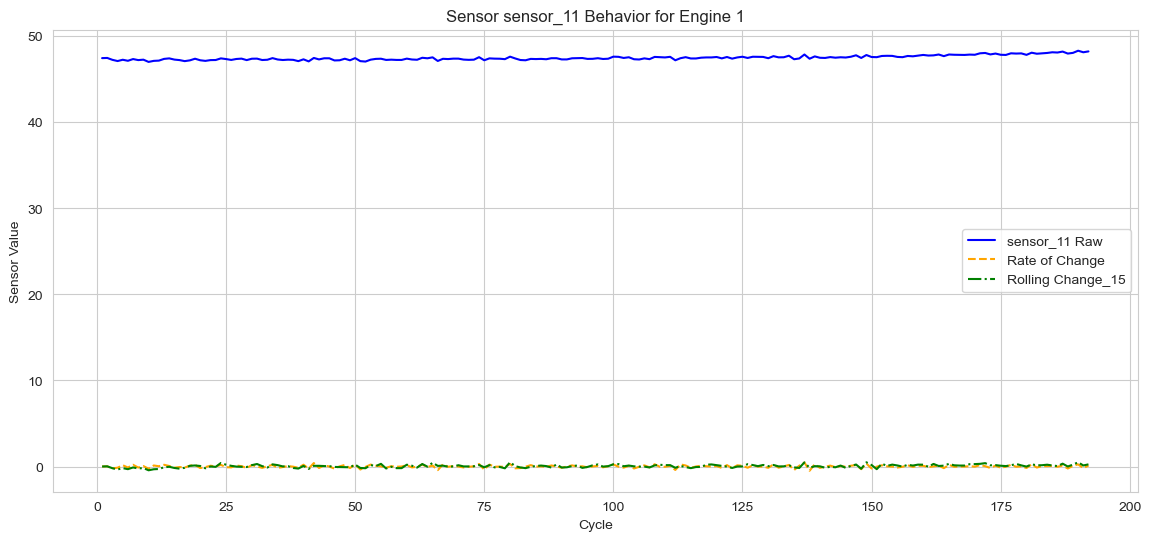

In [34]:
# Example: Plotting Sensor s3 for engine id = 1
engine_id = 1
sensor = 'sensor_11'

subset = train_copy_ROC[train_copy_ROC['unit_number'] == engine_id]

plt.figure(figsize=(14,6))

plt.plot(subset['time_cycles'], subset[sensor], label=f'{sensor} Raw', color='blue')
plt.plot(subset['time_cycles'], subset[f'{sensor}_rate_of_change'], label='Rate of Change', linestyle='--', color='orange')
plt.plot(subset['time_cycles'], subset[f'{sensor}_rolling_change_15'], label='Rolling Change_15', linestyle='-.', color='green')

plt.xlabel('Cycle')
plt.ylabel('Sensor Value')
plt.legend()
plt.title(f'Sensor {sensor} Behavior for Engine {engine_id}')
plt.grid(True)
plt.show()


C:\Users\CM\AppData\Local\Temp\ipykernel_11720\3185139500.py:3: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.scatterplot(data=train_copy_ROC, x=f'sensor_5_rate_of_change', y='RUL', palette='tab10')


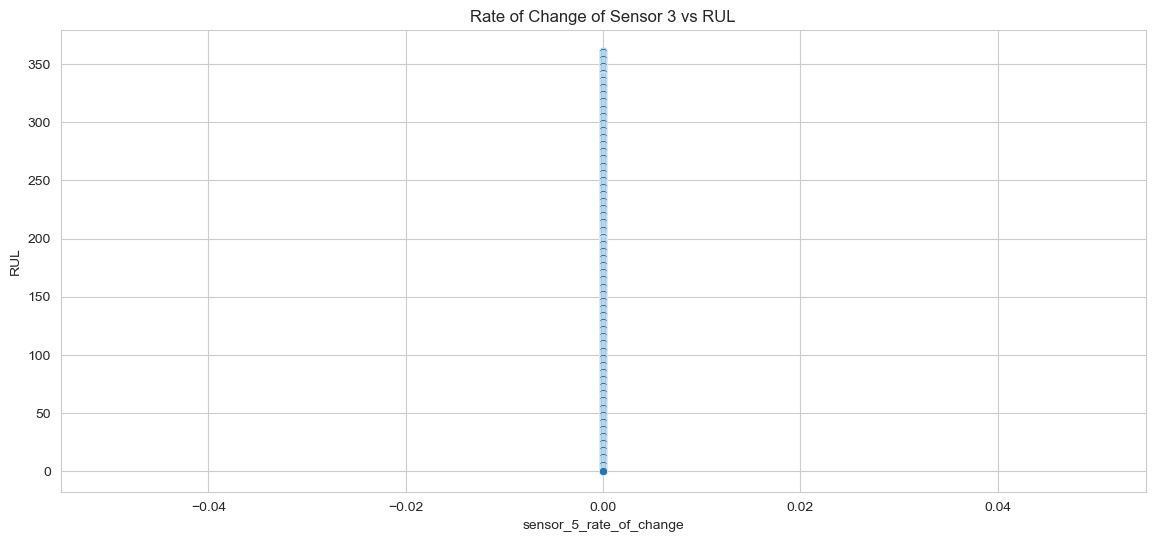

In [35]:
# Example for s3 rate of change
plt.figure(figsize=(14,6))
sns.scatterplot(data=train_copy_ROC, x=f'sensor_5_rate_of_change', y='RUL', palette='tab10')
plt.title('Rate of Change of Sensor 3 vs RUL')
plt.show()

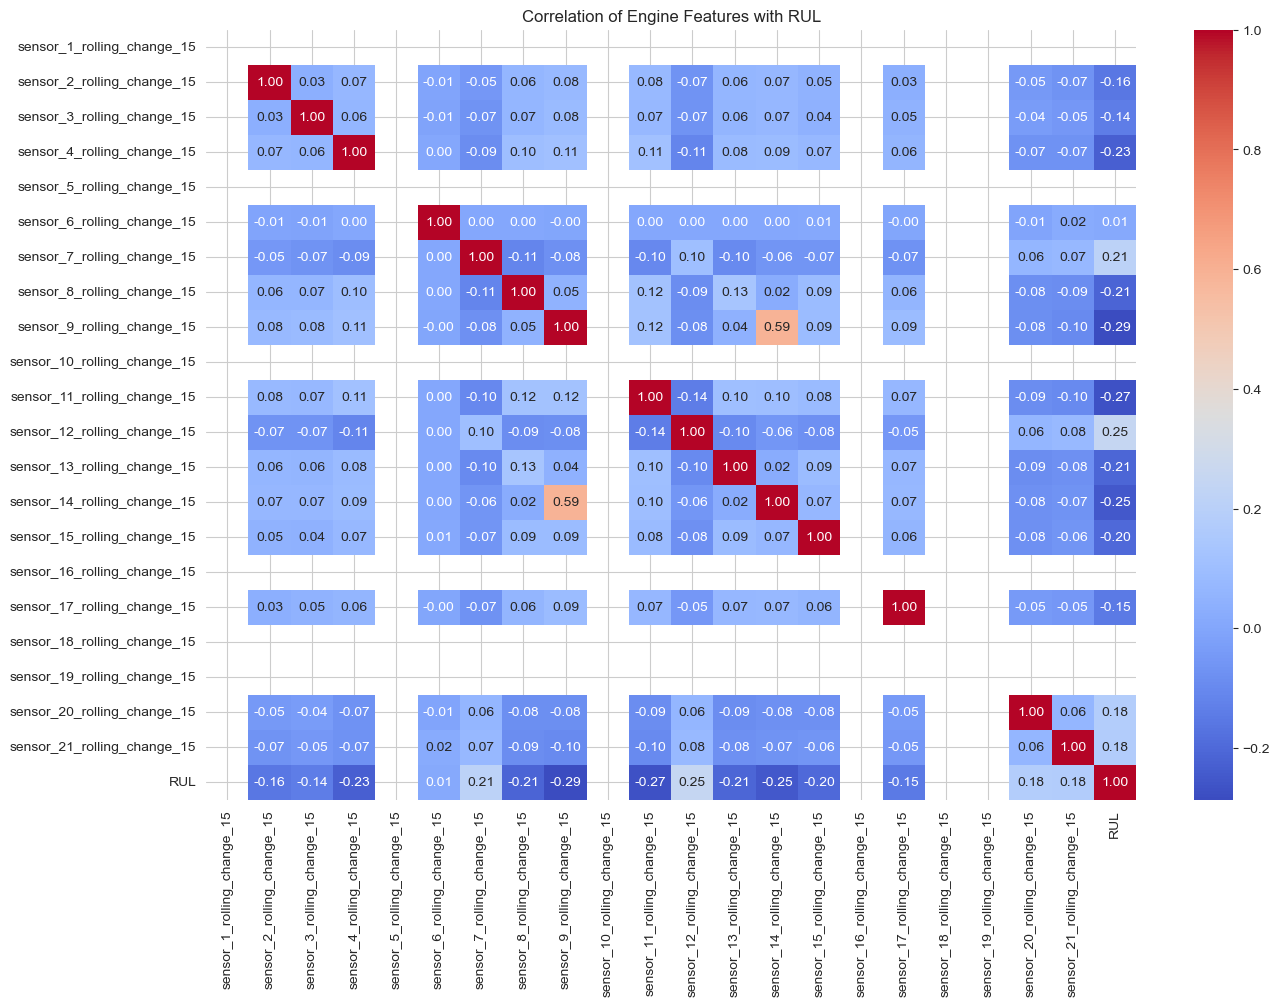

In [36]:
import numpy as np

change_features = [col for col in train_copy_ROC.columns if '_rolling_change' in col]
corr = train_copy_ROC[change_features + ['RUL']].corr()

plt.figure(figsize=(15,10))
sns.heatmap(corr, annot=True, fmt=".2f", cmap='coolwarm')
plt.title('Correlation of Engine Features with RUL')
plt.show()


## ⚖️ Scaling <a name="scaling"></a>

In [37]:
# scaler object
sc = StandardScaler()

In [38]:
# Separate non-feature columns (metadata)
non_scaled_cols = ['unit_number', 'time_cycles', 'RUL']  # Keep these unchanged
features_to_scale = [col for col in train_df.columns if col not in non_scaled_cols]

In [39]:
# Scale features
train_df[features_to_scale] = sc.fit_transform(train_df[features_to_scale])

In [40]:
joblib.dump(sc, "scaler.pkl")  # Save the fitted scaler to reuse during inference


['scaler.pkl']

In [41]:
train_df.head()

,unit_number,time_cycles,op_setting_1,op_setting_2,op_setting_3,sensor_1,sensor_2,sensor_3,sensor_4,sensor_5,...,sensor_13,sensor_14,sensor_15,sensor_16,sensor_17,sensor_18,sensor_19,sensor_20,sensor_21,RUL
0,1,1,-0.315980,-1.372953,0.0,0.0,-1.721725,-0.134255,-0.925936,-1.776357e-15,...,-1.058890,-0.269071,-0.603816,-1.387779e-17,-0.781710,0.0,0.0,1.348493,1.194427,191
1,1,2,0.872722,-1.031720,0.0,0.0,-1.061780,0.211528,-0.643726,-1.776357e-15,...,-0.363646,-0.642845,-0.275852,-1.387779e-17,-0.781710,0.0,0.0,1.016528,1.236922,190
2,1,3,-1.961874,1.015677,0.0,0.0,-0.661813,-0.413166,-0.525953,-1.776357e-15,...,-0.919841,-0.551629,-0.649144,-1.387779e-17,-2.073094,0.0,0.0,0.739891,0.503423,189
3,1,4,0.324090,-0.008022,0.0,0.0,-0.661813,-1.261314,-0.784831,-1.776357e-15,...,-0.224597,-0.520176,-1.971665,-1.387779e-17,-0.781710,0.0,0.0,0.352598,0.777792,188
4,1,5,-0.864611,-0.690488,0.0,0.0,-0.621816,-1.251528,-0.301518,-1.776357e-15,...,-0.780793,-0.521748,-0.339845,-1.387779e-17,-0.136018,0.0,0.0,0.463253,1.059552,187


## 🔬 PCA <a name="pca"></a>

In [42]:
train_df.columns

Index(['unit_number', 'time_cycles', 'op_setting_1', 'op_setting_2',
       'op_setting_3', 'sensor_1', 'sensor_2', 'sensor_3', 'sensor_4',
       'sensor_5', 'sensor_6', 'sensor_7', 'sensor_8', 'sensor_9', 'sensor_10',
       'sensor_11', 'sensor_12', 'sensor_13', 'sensor_14', 'sensor_15',
       'sensor_16', 'sensor_17', 'sensor_18', 'sensor_19', 'sensor_20',
       'sensor_21', 'RUL'],
      dtype='object')

In [43]:
from sklearn.decomposition import PCA

In [44]:
pca = PCA(n_components=4)

In [45]:
pca.fit_transform(train_df)

array([[-135.08922781,  -36.60596197,   38.90700002,    0.54528672],
       [-133.66209569,  -36.61055339,   38.90102066,    1.1970574 ],
       [-132.26282078,  -36.60440049,   38.90791648,    0.50079634],
       ...,
       [ 138.04074127,    9.1622274 ,  -49.08192493,    4.26922844],
       [ 139.44835257,    9.1645425 ,  -49.07976334,    3.99194257],
       [ 140.86261071,    9.16143915,  -49.0860859 ,    4.22399116]])

In [46]:
pca.explained_variance_ratio_

array([7.95631404e-01, 1.30536616e-01, 7.27192403e-02, 3.79570779e-04])

In [47]:
df_pca = pd.DataFrame(pca.components_, columns=train_df.columns)
df_pca.head(3)

,unit_number,time_cycles,op_setting_1,op_setting_2,op_setting_3,sensor_1,sensor_2,sensor_3,sensor_4,sensor_5,...,sensor_13,sensor_14,sensor_15,sensor_16,sensor_17,sensor_18,sensor_19,sensor_20,sensor_21,RUL
0,0.000006,0.706856,-0.000008,0.000107,0.0,0.0,0.006838,0.006673,0.007708,0.0,...,0.006151,0.004002,0.007281,0.0,0.006937,0.0,0.0,-0.007173,-0.007224,-0.706899
1,0.410392,0.644912,-0.000413,0.000411,-0.0,-0.0,-0.001737,-0.001224,-0.001558,-0.0,...,-0.002407,0.001564,-0.001577,-0.0,-0.001169,-0.0,-0.0,0.001326,0.001491,0.644691
2,-0.911884,0.290277,0.000428,0.000596,0.0,0.0,-0.002012,-0.001532,-0.002378,0.0,...,-0.003839,0.003804,-0.002239,0.0,-0.001526,0.0,0.0,0.001955,0.001913,0.290003


In [48]:
loadings_abs = np.abs(pca.components_)

feature_importance = pd.Series(loadings_abs.sum(axis=0), index=df_pca.columns)

sorted_features = feature_importance.sort_values(ascending=False)
sorted_features

RUL             1.664480e+00
time_cycles     1.651303e+00
unit_number     1.328408e+00
sensor_8        3.603084e-01
sensor_13       3.599564e-01
sensor_12       3.125326e-01
sensor_7        3.061063e-01
sensor_11       3.021260e-01
sensor_4        2.880260e-01
sensor_15       2.758767e-01
sensor_20       2.724789e-01
sensor_21       2.711731e-01
sensor_2        2.674941e-01
sensor_17       2.451322e-01
sensor_3        2.378685e-01
sensor_14       1.605580e-01
sensor_9        1.169187e-01
sensor_6        7.705742e-02
op_setting_2    1.215704e-02
op_setting_1    8.034704e-03
op_setting_3    6.938894e-18
sensor_1        8.673617e-19
sensor_5        6.617445e-24
sensor_10       0.000000e+00
sensor_16       0.000000e+00
sensor_18       0.000000e+00
sensor_19       0.000000e+00
dtype: float64

In [49]:
n_top_features = 10
selected_columns = sorted_features.head(n_top_features).index

reduced_df = train_df[selected_columns]

reduced_df.head()

,RUL,time_cycles,unit_number,sensor_8,sensor_13,sensor_12,sensor_7,sensor_11,sensor_4,sensor_15
0,191,1,1,-0.516338,-1.058890,0.334262,1.121141,-0.266467,-0.925936,-0.603816
1,190,2,1,-0.798093,-0.363646,1.174899,0.431930,-0.191583,-0.643726,-0.275852
2,189,3,1,-0.234584,-0.919841,1.364721,1.008155,-1.015303,-0.525953,-0.649144
3,188,4,1,0.188048,-0.224597,1.961302,1.222827,-1.539489,-0.784831,-1.971665
4,187,5,1,-0.516338,-0.780793,1.052871,0.714393,-0.977861,-0.301518,-0.339845


In [50]:
reduced_df['unit_number'].unique()

[1, 2, 3, 4, 5, ..., 96, 97, 98, 99, 100]
Length: 100
Categories (100, int64): [1, 2, 3, 4, ..., 97, 98, 99, 100]

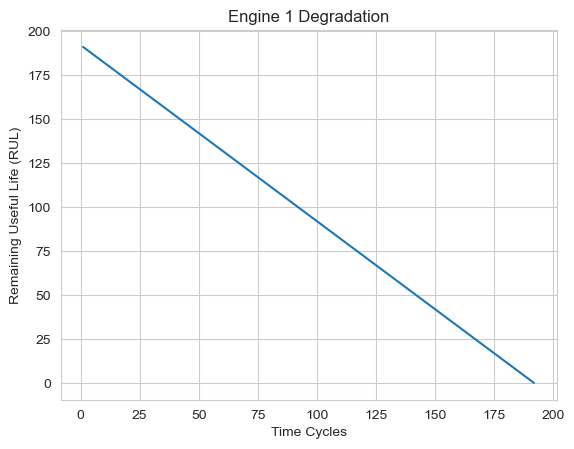

In [51]:
# Plot RUL degradation for one engine
engine_id = 1
engine_data = reduced_df[reduced_df['unit_number'] == engine_id]

plt.plot(engine_data['time_cycles'], engine_data['RUL'])
plt.xlabel('Time Cycles')
plt.ylabel('Remaining Useful Life (RUL)')
plt.title(f'Engine {engine_id} Degradation')
plt.show()

C:\Users\CM\AppData\Local\Temp\ipykernel_11720\3610050490.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df_max_rul = reduced_df[['unit_number', 'RUL']].groupby('unit_number').max().reset_index()


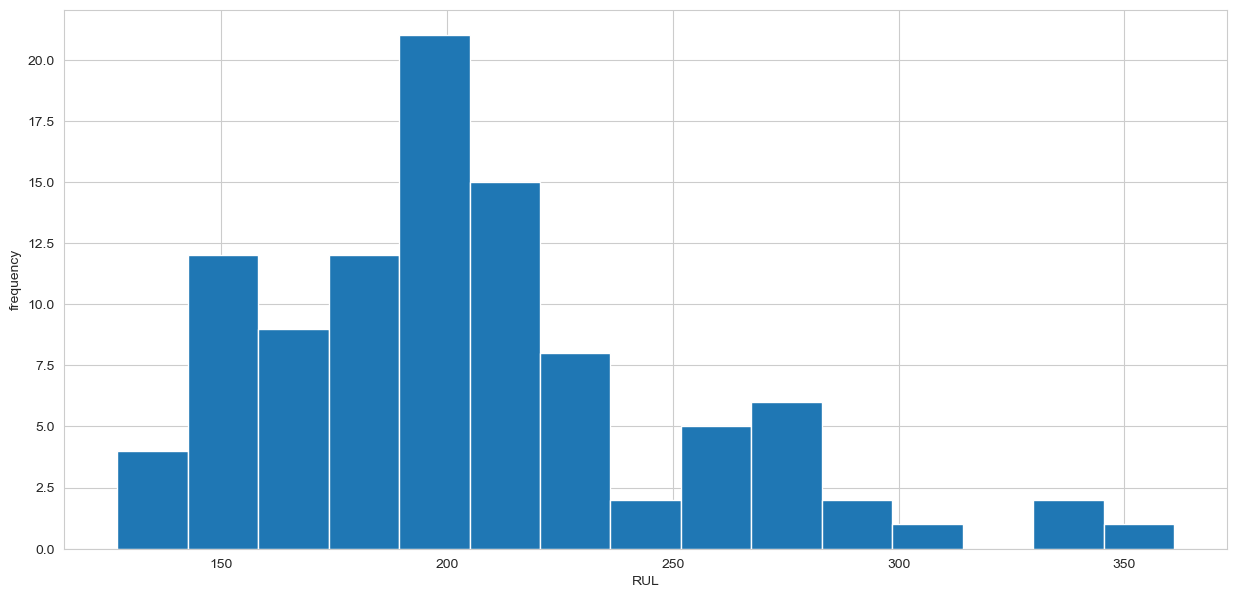

In [52]:
df_max_rul = reduced_df[['unit_number', 'RUL']].groupby('unit_number').max().reset_index()
df_max_rul['RUL'].hist(bins=15, figsize=(15,7))
plt.xlabel('RUL')
plt.ylabel('frequency')
plt.show()

## Correlations

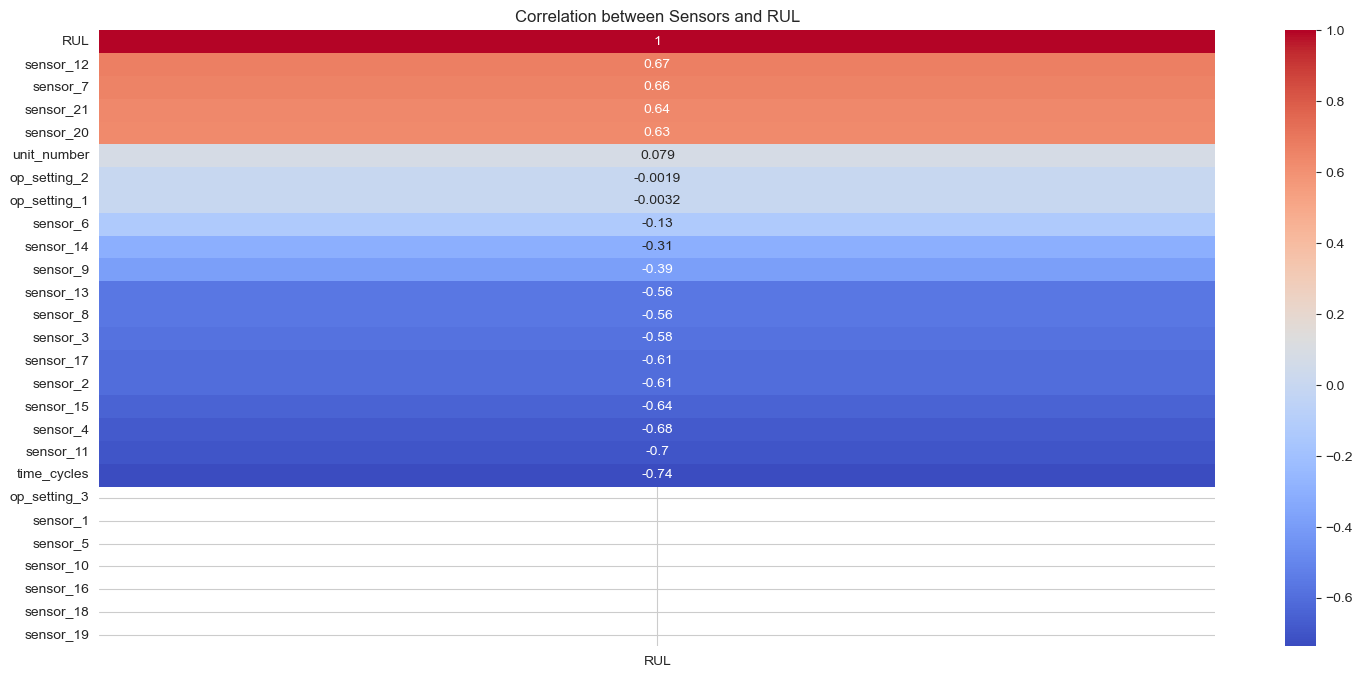

In [117]:
plt.figure(figsize=(18,8))

corr = train_df.corr()

sns.heatmap(corr[['RUL']].sort_values(by='RUL', ascending=False), annot=True, cmap='coolwarm')
plt.title('Correlation between Sensors and RUL')
plt.show()

In [118]:
corr_RUL = corr['RUL']
feature_selected =  corr_RUL[corr_RUL.abs() >= 0.5].index[1:]
feature_selected

Index(['sensor_2', 'sensor_3', 'sensor_4', 'sensor_7', 'sensor_8', 'sensor_11',
       'sensor_12', 'sensor_13', 'sensor_15', 'sensor_17', 'sensor_20',
       'sensor_21', 'RUL'],
      dtype='object')

In [119]:
corr_df=train_df[feature_selected]
corr_df.head()

,sensor_2,sensor_3,sensor_4,sensor_7,sensor_8,sensor_11,sensor_12,sensor_13,sensor_15,sensor_17,sensor_20,sensor_21,RUL
0,641.82,1589.70,1400.60,554.36,2388.06,47.47,521.66,2388.02,8.4195,392,39.06,23.4190,191
1,642.15,1591.82,1403.14,553.75,2388.04,47.49,522.28,2388.07,8.4318,392,39.00,23.4236,190
2,642.35,1587.99,1404.20,554.26,2388.08,47.27,522.42,2388.03,8.4178,390,38.95,23.3442,189
3,642.35,1582.79,1401.87,554.45,2388.11,47.13,522.86,2388.08,8.3682,392,38.88,23.3739,188
4,642.37,1582.85,1406.22,554.00,2388.06,47.28,522.19,2388.04,8.4294,393,38.90,23.4044,187


[📝Check List](#Check-List)

# 📂 Splitting Data <a name="splitting-data"></a>

In [120]:
# train & y_train
# Calculated RUL variable is our Target variable.
y =corr_df['RUL'].clip(upper=125)
X =corr_df.drop(['RUL'],axis=1)
X.head(5)

,sensor_2,sensor_3,sensor_4,sensor_7,sensor_8,sensor_11,sensor_12,sensor_13,sensor_15,sensor_17,sensor_20,sensor_21
0,641.82,1589.70,1400.60,554.36,2388.06,47.47,521.66,2388.02,8.4195,392,39.06,23.4190
1,642.15,1591.82,1403.14,553.75,2388.04,47.49,522.28,2388.07,8.4318,392,39.00,23.4236
2,642.35,1587.99,1404.20,554.26,2388.08,47.27,522.42,2388.03,8.4178,390,38.95,23.3442
3,642.35,1582.79,1401.87,554.45,2388.11,47.13,522.86,2388.08,8.3682,392,38.88,23.3739
4,642.37,1582.85,1406.22,554.00,2388.06,47.28,522.19,2388.04,8.4294,393,38.90,23.4044


In [121]:
# 📊 Splitting the data into training and test sets
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.1, random_state=42)
print(X_train.shape)
print(X_val.shape)

(18567, 12)
(2064, 12)


[📝Check List](#Check-List)

# ⚙️ Initialize estimators and hyperparameters <a name="initialize-estimators-and-hyperparameters"></a>

In [ ]:
models = {
    "Linear Regression": LinearRegression(),
    "knn regressor" : KNeighborsRegressor(),
    "Decision Tree" : DecisionTreeRegressor(),
    "Random Forest Regressor" : RandomForestRegressor(n_estimators=100 , random_state=42),
    "XGB Regressor" : XGBRegressor(objective='reg:squarederror',
    n_estimators=500,
    max_depth=6,
    learning_rate=0.1,
    random_state = 42),
    "LightGBM" : lgb.LGBMRegressor(objective='regression',
    n_estimators=500,
    max_depth=6,
    learning_rate=0.1,
    random_state = 42)
}

In [59]:

# Initialize the estimators
reg1 = GradientBoostingRegressor()
reg2 = RandomForestRegressor()
reg3 = XGBRegressor()

In [60]:
# Initialize the hyperparameters

# Gradient Boosting
param1 = {}
param1['regressor'] = [reg1]
param1['regressor__max_depth'] = [3, 4, 5, 6, 7, 8, 9, 10]
param1['regressor__n_estimators'] = [50, 100, 150, 200, 250, 300]
param1['regressor__learning_rate'] = list(np.round(np.linspace(0.01, 0.3, 20), 3))
param1['regressor__subsample'] = list(np.round(np.linspace(0.6, 1.0, 10), 2))
param1['regressor__max_features'] = ['sqrt', None]
param1['regressor__min_samples_split'] = [2, 3, 4, 5, 6, 7, 8, 9, 10]
param1['regressor__min_samples_leaf'] = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]

# RandomForest
param2 = {}
param2['regressor'] = [reg2]
param2['regressor__n_estimators'] = [50, 100, 150, 200, 250, 300]
param2['regressor__max_depth'] = [None, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15]
param2['regressor__min_samples_split'] = [2, 3, 4, 5, 6, 7, 8, 9, 10]
param2['regressor__min_samples_leaf'] = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]
param2['regressor__max_features'] = ['sqrt', 'log2', None]
param2['regressor__bootstrap'] = [True, False]

# XGBRegressor
param3 = {}
param3['regressor'] = [reg3]
param3['regressor__max_depth'] = [3, 4, 5, 6, 7, 8, 9, 10]
param3['regressor__n_estimators'] = [50, 100, 150, 200, 250, 300]
param3['regressor__learning_rate'] = list(np.round(np.linspace(0.01, 0.3, 20), 3))
param3['regressor__subsample'] = list(np.round(np.linspace(0.6, 1.0, 10), 2))
param3['regressor__colsample_bytree'] = list(np.round(np.linspace(0.6, 1.0, 10), 2))
param3['regressor__gamma'] = list(np.round(np.linspace(0, 0.3, 10), 2))
param3['regressor__reg_alpha'] = list(np.round(np.linspace(0, 1, 10), 2))
param3['regressor__reg_lambda'] = list(np.round(np.linspace(0, 1, 10), 2))


In [61]:

pipeline = Pipeline([('regressor', reg1)])
params = [param1, param2, param3]


[📝Check List](#Check-List)

# 🎯 Randomized Search CV <a name="randomized-search-cv"></a>

In [62]:
def evaluate_model(true, predicted):
    mae = mean_absolute_error(true, predicted)
    mse = mean_squared_error(true, predicted)
    rmse = np.sqrt(mean_squared_error(true, predicted))
    r2_square = r2_score(true, predicted)

    return mae, mse, rmse, r2_square

In [63]:
models_list = []
r2_list = []

In [ ]:
for i in range(len(list(models))):
    model = list(models.values())[i]
    model.fit(X_train, y_train)

    #model prediction
    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)


    #model evaluation
    train_mae, train_mse, train_rmse, train_r2 = evaluate_model(y_train, y_train_pred)
    test_mae, test_mse, test_rmse, test_r2 = evaluate_model(y_test, y_test_pred)

    print(list(models.keys())[i])

    models_list.append(list(models.keys())[i])

    print("model training performance")

    print("mean absolute error", train_mae)
    print("mean squared error", train_mse)
    print("root mean squared error", train_rmse)
    print("r2 square", train_r2)

    print("model testing performance")
    print("mean absolute error", test_mae)
    print("mean squared error", test_mse)
    print("root mean squared error", test_rmse)
    print("r2 square", test_r2)

    print('------------------------------')


    r2_list.append(test_r2)

In [ ]:
pd.DataFrame(list(zip(models_list, r2_list)), columns = ['model name', 'r2_score']).sort_values(by = ['r2_score'], ascending = False)

In [ ]:
%%time
# Perform randomized search cross-validation
rs = RandomizedSearchCV(pipeline, params, cv=3, scoring='r2', n_iter=50, random_state=42).fit(X_train, y_train)

In [ ]:
# Best performing model and its corresponding hyperparameters
rs.best_params_

In [ ]:
# r2 score for the best model
rs.best_score_

[📝Check List](#Check-List)

# 📈 The best Model Training <a name="the-best-model-training"></a>

## 1- XGboost Model 

In [122]:
model_xgb = XGBRegressor(
    learning_rate=0.147,
    max_depth=8,
    n_estimators=250,
    subsample=0.82,
    reg_lambda=0.11,
    reg_alpha=0.22,
    gamma=0.27,
    colsample_bytree=1.0,
    objective='reg:squarederror',
    eval_metric='rmse',
    early_stopping_rounds=10,
    random_state=42,
    n_jobs=-1
)


In [123]:
mlflow.set_experiment("Aircraft_Engine_RUL_Prediction")

# End any active run before starting a new one
if mlflow.active_run():
    mlflow.end_run()

#  Start MLflow tracking
with mlflow.start_run():

    #  Log model parameters
    mlflow.log_params({
        'learning_rate': 0.147,
        'max_depth': 8,
        'n_estimators': 250,
        'subsample': 0.82,
        'reg_lambda': 0.11,
        'reg_alpha': 0.22,
        'gamma': 0.27,
        'colsample_bytree': 1.0,
        'model_type': 'XGBoost'
    })

    #  Train the model
    model_xgb.fit(
        X_train, y_train,
        eval_set=[(X_val, y_val)],
        verbose=False
    )

    #  Predict and evaluate
    y_val_pred = model_xgb.predict(X_val)
    y_tr_pred = model_xgb.predict(X_train)

    val_rmse = np.sqrt(mean_squared_error(y_val, y_val_pred))
    train_rmse = np.sqrt(mean_squared_error(y_train, y_tr_pred))
    r2 = r2_score(y_val, y_val_pred)

    #  Log evaluation metrics
    mlflow.log_metric('val_rmse', val_rmse)
    mlflow.log_metric('train_rmse', train_rmse)
    mlflow.log_metric('r2_score', r2)

    #  Log RMSE for each boosting round
    evals_result = model_xgb.evals_result()
    for i, rmse in enumerate(evals_result['validation_0']['rmse']):
        mlflow.log_metric('val_rmse_per_round', rmse, step=i)

    #  Log the trained model with input example and signature
    input_example = pd.DataFrame(X_train[:1])
    signature = infer_signature(X_train, model_xgb.predict(X_train))

    mlflow.xgboost.log_model(
        model_xgb,
        artifact_path="model_xgb",
        input_example=input_example,
        signature=signature
    )


Traceback (most recent call last):
  File "c:\Users\CM\miniconda3\envs\predictive_maintenance-env\Lib\site-packages\mlflow\store\tracking\file_store.py", line 329, in search_experiments
    exp = self._get_experiment(exp_id, view_type)
          ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "c:\Users\CM\miniconda3\envs\predictive_maintenance-env\Lib\site-packages\mlflow\store\tracking\file_store.py", line 427, in _get_experiment
    meta = FileStore._read_yaml(experiment_dir, FileStore.META_DATA_FILE_NAME)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "c:\Users\CM\miniconda3\envs\predictive_maintenance-env\Lib\site-packages\mlflow\store\tracking\file_store.py", line 1373, in _read_yaml
    return _read_helper(root, file_name, attempts_remaining=retries)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "c:\Users\CM\miniconda3\envs\predictive_maintenance-env\Lib\site-packages\mlflow\store\tracking\file_store.py", line 13

In [124]:
# model registry
mlflow.xgboost.log_model(
        xgb_model=model_xgb,
        artifact_path="model_xgb",
        registered_model_name="xgb_maintenance_model"
    )

2025/04/15 20:17:35 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.
Registered model 'xgb_maintenance_model' already exists. Creating a new version of this model...
Created version '2' of model 'xgb_maintenance_model'.


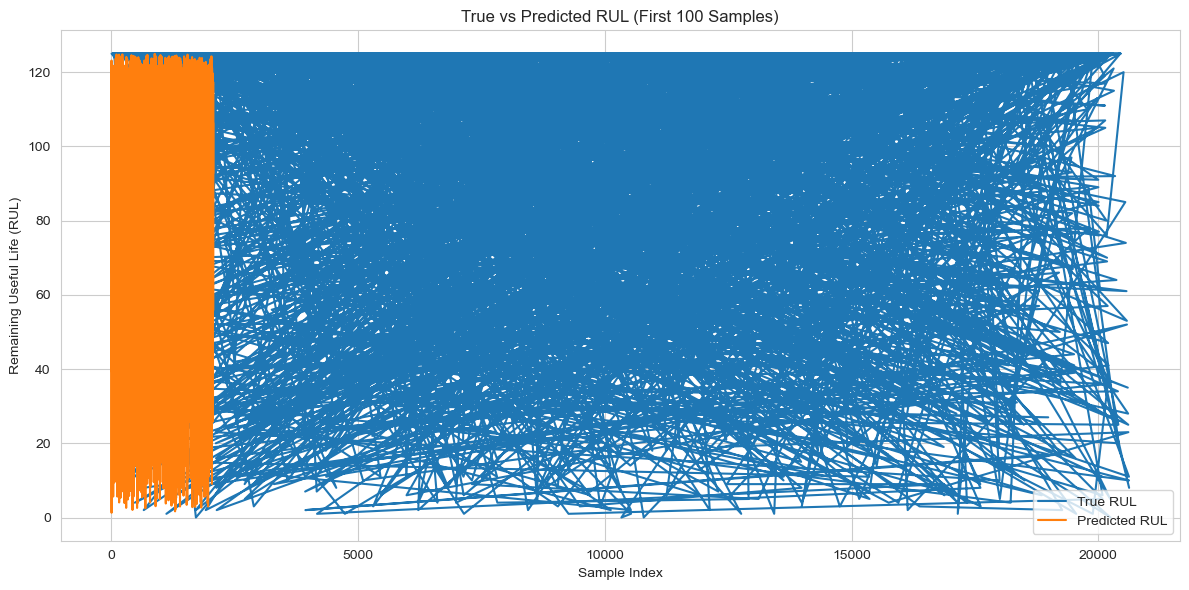

In [125]:
# 8. Visualize results
plt.figure(figsize=(12, 6))
plt.plot(y_val, label='True RUL')
plt.plot(y_val_pred, label='Predicted RUL')
plt.xlabel('Sample Index')
plt.ylabel('Remaining Useful Life (RUL)')
plt.title('True vs Predicted RUL (First 100 Samples)')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

## 2- Random Forest Model

In [126]:
model_rf = RandomForestRegressor(
    n_estimators=250,
    max_depth=8,
    random_state=42,
    n_jobs=-1
)

In [127]:
mlflow.set_experiment("Aircraft_Engine_RUL_Prediction_RF")

if mlflow.active_run():
    mlflow.end_run()

with mlflow.start_run():

    # Log model parameters
    mlflow.log_params({
        'n_estimators': 250,
        'max_depth': 8,
        'model_type': 'RandomForest'
    })

    # Train the model
    model_rf.fit(X_train, y_train)

    # Predict and evaluate
    y_val_pred_rf = model_rf.predict(X_val)
    y_tr_pred_rf = model_rf.predict(X_train)

    val_rmse_rf = np.sqrt(mean_squared_error(y_val, y_val_pred_rf))
    train_rmse_rf = np.sqrt(mean_squared_error(y_train, y_tr_pred_rf))
    r2_rf = r2_score(y_val, y_val_pred_rf)

    # Log evaluation metrics
    mlflow.log_metric('val_rmse', val_rmse_rf)
    mlflow.log_metric('train_rmse', train_rmse_rf)
    mlflow.log_metric('r2_score', r2_rf)

    # Log the trained model with input example and signature
    input_example_rf = pd.DataFrame(X_train[:1])
    signature_rf = infer_signature(X_train, model_rf.predict(X_train))

    mlflow.sklearn.log_model(
        model_rf,
        artifact_path="model_rf",
        input_example=input_example_rf,
        signature=signature_rf
    )


Traceback (most recent call last):
  File "c:\Users\CM\miniconda3\envs\predictive_maintenance-env\Lib\site-packages\mlflow\store\tracking\file_store.py", line 329, in search_experiments
    exp = self._get_experiment(exp_id, view_type)
          ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "c:\Users\CM\miniconda3\envs\predictive_maintenance-env\Lib\site-packages\mlflow\store\tracking\file_store.py", line 427, in _get_experiment
    meta = FileStore._read_yaml(experiment_dir, FileStore.META_DATA_FILE_NAME)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "c:\Users\CM\miniconda3\envs\predictive_maintenance-env\Lib\site-packages\mlflow\store\tracking\file_store.py", line 1373, in _read_yaml
    return _read_helper(root, file_name, attempts_remaining=retries)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "c:\Users\CM\miniconda3\envs\predictive_maintenance-env\Lib\site-packages\mlflow\store\tracking\file_store.py", line 13

In [128]:
# registry
mlflow.sklearn.log_model(
        sk_model=model_rf,
        artifact_path="model_rf",
        registered_model_name="rf_maintenance_model"
    )

2025/04/15 20:18:03 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.
Registered model 'rf_maintenance_model' already exists. Creating a new version of this model...
Created version '2' of model 'rf_maintenance_model'.


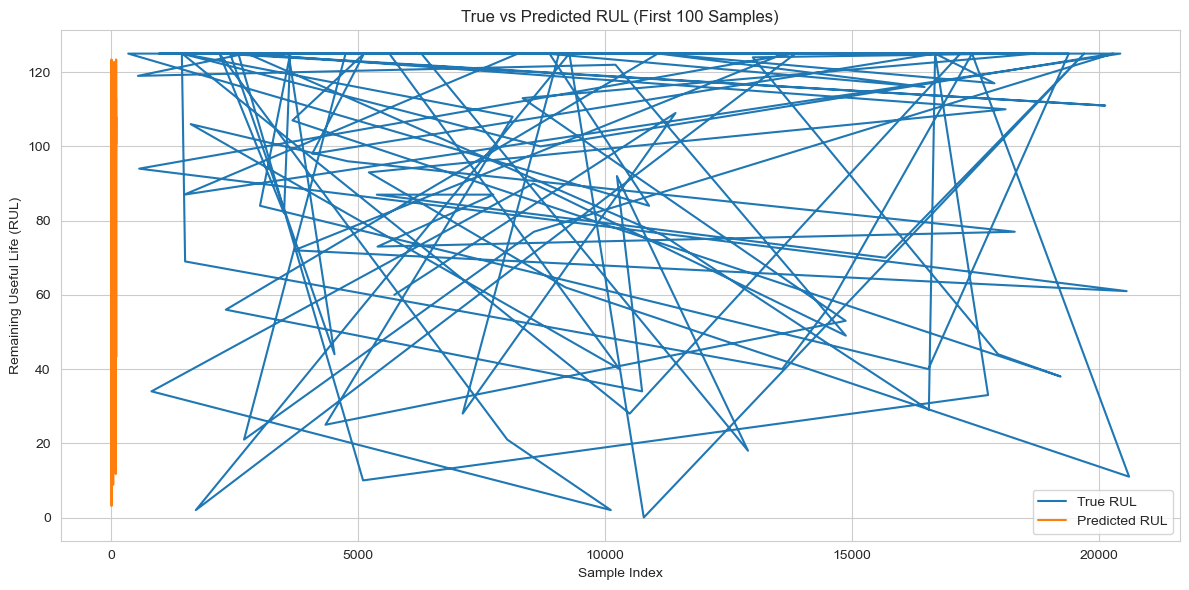

In [130]:
# 8. Visualize results
plt.figure(figsize=(12, 6))
plt.plot(y_val[:100], label='True RUL')
plt.plot(y_val_pred_rf[:100], label='Predicted RUL')
plt.xlabel('Sample Index')
plt.ylabel('Remaining Useful Life (RUL)')
plt.title('True vs Predicted RUL (First 100 Samples)')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

[📝Check List](#Check-List)

# 💾 Saving the model <a name="saving-the-model"></a>

In [131]:
joblib.dump(model_xgb, 'xgb_model.p')

['xgb_model.p']

In [132]:
joblib.dump(model_rf, "rf_model.pkl")

['rf_model.pkl']

[📝Check List](#Check-List)

# 🧪 Test Data Preparation <a name="test-data-preparation"></a>

## importing Data

In [133]:
test_df = pd.read_csv('./data/test_FD001.txt', sep='\s+', header=None, names=column_names)
y_test = pd.read_csv('./data/RUL_FD001.txt', sep='\s+', header=None, names=['RUL'])

In [134]:
test_df.head()

,unit_number,time_cycles,op_setting_1,op_setting_2,op_setting_3,sensor_1,sensor_2,sensor_3,sensor_4,sensor_5,...,sensor_12,sensor_13,sensor_14,sensor_15,sensor_16,sensor_17,sensor_18,sensor_19,sensor_20,sensor_21
0,1,1,0.0023,0.0003,100.0,518.67,643.02,1585.29,1398.21,14.62,...,521.72,2388.03,8125.55,8.4052,0.03,392,2388,100.0,38.86,23.3735
1,1,2,-0.0027,-0.0003,100.0,518.67,641.71,1588.45,1395.42,14.62,...,522.16,2388.06,8139.62,8.3803,0.03,393,2388,100.0,39.02,23.3916
2,1,3,0.0003,0.0001,100.0,518.67,642.46,1586.94,1401.34,14.62,...,521.97,2388.03,8130.10,8.4441,0.03,393,2388,100.0,39.08,23.4166
3,1,4,0.0042,0.0000,100.0,518.67,642.44,1584.12,1406.42,14.62,...,521.38,2388.05,8132.90,8.3917,0.03,391,2388,100.0,39.00,23.3737
4,1,5,0.0014,0.0000,100.0,518.67,642.51,1587.19,1401.92,14.62,...,522.15,2388.03,8129.54,8.4031,0.03,390,2388,100.0,38.99,23.4130


## 🔍Discovering Data

In [ ]:
test_df.shape

(13096, 26)

In [ ]:
test_df.columns

Index(['unit_number', 'time_cycles', 'op_setting_1', 'op_setting_2',
       'op_setting_3', 'sensor_1', 'sensor_2', 'sensor_3', 'sensor_4',
       'sensor_5', 'sensor_6', 'sensor_7', 'sensor_8', 'sensor_9', 'sensor_10',
       'sensor_11', 'sensor_12', 'sensor_13', 'sensor_14', 'sensor_15',
       'sensor_16', 'sensor_17', 'sensor_18', 'sensor_19', 'sensor_20',
       'sensor_21'],
      dtype='object')

In [ ]:
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13096 entries, 0 to 13095
Data columns (total 26 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   unit_number   13096 non-null  int64  
 1   time_cycles   13096 non-null  int64  
 2   op_setting_1  13096 non-null  float64
 3   op_setting_2  13096 non-null  float64
 4   op_setting_3  13096 non-null  float64
 5   sensor_1      13096 non-null  float64
 6   sensor_2      13096 non-null  float64
 7   sensor_3      13096 non-null  float64
 8   sensor_4      13096 non-null  float64
 9   sensor_5      13096 non-null  float64
 10  sensor_6      13096 non-null  float64
 11  sensor_7      13096 non-null  float64
 12  sensor_8      13096 non-null  float64
 13  sensor_9      13096 non-null  float64
 14  sensor_10     13096 non-null  float64
 15  sensor_11     13096 non-null  float64
 16  sensor_12     13096 non-null  float64
 17  sensor_13     13096 non-null  float64
 18  sensor_14     13096 non-nu

# Test data preprocessing

## ❓Missing Values

In [ ]:
test_df.isna().sum()

unit_number     0
time_cycles     0
op_setting_1    0
op_setting_2    0
op_setting_3    0
sensor_1        0
sensor_2        0
sensor_3        0
sensor_4        0
sensor_5        0
sensor_6        0
sensor_7        0
sensor_8        0
sensor_9        0
sensor_10       0
sensor_11       0
sensor_12       0
sensor_13       0
sensor_14       0
sensor_15       0
sensor_16       0
sensor_17       0
sensor_18       0
sensor_19       0
sensor_20       0
sensor_21       0
dtype: int64

## 🔄Duplicates

In [ ]:
test_df.duplicated().sum()

0

## 🛠️Feature Engineering

#### ⚖️ Scaling

In [ ]:
# # Separate non-feature columns (metadata)
# non_scaled_cols = ['unit_number', 'time_cycles', 'RUL']  # Keep these unchanged
# features_to_scale = [col for col in test_df.columns if col not in non_scaled_cols]

In [ ]:
# # Scale features
# test_df[features_to_scale] = sc.fit_transform(test_df[features_to_scale])

In [ ]:
# test_df.head()

,unit_number,time_cycles,op_setting_1,op_setting_2,op_setting_3,sensor_1,sensor_2,sensor_3,sensor_4,sensor_5,...,sensor_12,sensor_13,sensor_14,sensor_15,sensor_16,sensor_17,sensor_18,sensor_19,sensor_20,sensor_21
0,1,1,1.049295,1.005927,0.0,0.0,1.359276,-0.561495,-0.975674,-1.776357e-15,...,-0.049542,-0.720590,-1.315031,-0.711659,-1.040834e-17,-0.463406,0.0,0.0,-0.229408,0.448866
1,1,2,-1.220748,-1.034755,0.0,0.0,-1.908502,0.070116,-1.392836,-1.776357e-15,...,0.736727,-0.193647,0.065977,-1.570037,-1.040834e-17,0.347276,0.0,0.0,0.899934,0.664042
2,1,3,0.141278,0.325700,0.0,0.0,-0.037636,-0.231698,-0.507676,-1.776357e-15,...,0.397202,-0.720590,-0.868436,0.629340,-1.040834e-17,0.347276,0.0,0.0,1.323438,0.961247
3,1,4,1.911912,-0.014414,0.0,0.0,-0.087526,-0.795350,0.251888,-1.776357e-15,...,-0.657113,-0.369295,-0.593609,-1.177045,-1.040834e-17,-1.274088,0.0,0.0,0.758766,0.451244
4,1,5,0.640688,-0.014414,0.0,0.0,0.087088,-0.181729,-0.420954,-1.776357e-15,...,0.718857,-0.720590,-0.923402,-0.784053,-1.040834e-17,-2.084769,0.0,0.0,0.688182,0.918450


In [ ]:
test_df['time_cycles'].max()

303

### PCA columns selected

In [107]:
# Test data set , keeping only train columns/features.
X_test=test_df.groupby('unit_number').last().reset_index()    # take last row per engine , shows max time
X_test=X_test[selected_columns.drop('RUL')]
X_test.head(5)

,time_cycles,unit_number,sensor_8,sensor_13,sensor_12,sensor_7,sensor_11,sensor_4,sensor_15
0,31,1,2388.08,2388.06,521.79,554.42,47.23,1398.91,8.4024
1,49,2,2388.10,2388.09,521.74,553.52,47.67,1410.83,8.4505
2,126,3,2388.16,2388.14,520.83,552.59,47.88,1418.89,8.4119
3,106,4,2388.13,2388.11,521.88,552.64,47.65,1406.88,8.4634
4,98,5,2388.10,2388.15,521.00,553.29,47.46,1419.36,8.4362


### Correlation columns selected

In [135]:
# Test data set , keeping only train columns/features.
X_test=test_df.groupby('unit_number').last().reset_index()    # take last row per engine , shows max time
X_test=X_test[feature_selected.drop('RUL')]
X_test.head(5)

,sensor_2,sensor_3,sensor_4,sensor_7,sensor_8,sensor_11,sensor_12,sensor_13,sensor_15,sensor_17,sensor_20,sensor_21
0,642.58,1581.22,1398.91,554.42,2388.08,47.23,521.79,2388.06,8.4024,393,38.81,23.3552
1,642.55,1586.59,1410.83,553.52,2388.10,47.67,521.74,2388.09,8.4505,391,38.81,23.2618
2,642.88,1589.75,1418.89,552.59,2388.16,47.88,520.83,2388.14,8.4119,395,38.93,23.2740
3,642.78,1594.53,1406.88,552.64,2388.13,47.65,521.88,2388.11,8.4634,395,38.58,23.2581
4,642.27,1589.94,1419.36,553.29,2388.10,47.46,521.00,2388.15,8.4362,394,38.75,23.4117


[📝Check List](#Check-List)

# 🔄 Load the Model and Predict the Test Data

## RF model

In [136]:
from mlflow import MlflowClient

client = MlflowClient()
client.transition_model_version_stage(
    name="rf_maintenance_model",
    version=1,  
    stage="Production"
)

C:\Users\CM\AppData\Local\Temp\ipykernel_11720\3860432903.py:4: FutureWarning: ``mlflow.tracking.client.MlflowClient.transition_model_version_stage`` is deprecated since 2.9.0. Model registry stages will be removed in a future major release. To learn more about the deprecation of model registry stages, see our migration guide here: https://mlflow.org/docs/latest/model-registry.html#migrating-from-stages
  client.transition_model_version_stage(


<ModelVersion: aliases=[], creation_timestamp=1744740046839, current_stage='Production', description=None, last_updated_timestamp=1744741136936, name='rf_maintenance_model', run_id='b10ca018fbc24327b1d1da90139e04fa', run_link=None, source='file:///c:/Users/CM/Desktop/final%20project/Depi%20final%20project/project/mlruns/798788120507524617/b10ca018fbc24327b1d1da90139e04fa/artifacts/model_rf', status='READY', status_message=None, tags={}, user_id=None, version=1>

In [137]:
import mlflow.sklearn

model_rf = mlflow.sklearn.load_model("models:/rf_maintenance_model/production")

predictions = model_rf.predict(X_test)

## XGB Model

In [138]:
from mlflow import MlflowClient

client = MlflowClient()
client.transition_model_version_stage(
    name="xgb_maintenance_model",
    version=1,  
    stage="Production"
)


C:\Users\CM\AppData\Local\Temp\ipykernel_11720\856514875.py:4: FutureWarning: ``mlflow.tracking.client.MlflowClient.transition_model_version_stage`` is deprecated since 2.9.0. Model registry stages will be removed in a future major release. To learn more about the deprecation of model registry stages, see our migration guide here: https://mlflow.org/docs/latest/model-registry.html#migrating-from-stages
  client.transition_model_version_stage(


<ModelVersion: aliases=[], creation_timestamp=1744739985524, current_stage='Production', description=None, last_updated_timestamp=1744741139217, name='xgb_maintenance_model', run_id='12c4866ec2444f6a8c6293cada59818e', run_link=None, source=('file:///c:/Users/CM/Desktop/final project/Depi final '
 'project/project/mlruns/Aircraft_Engine_RUL_Prediction_artifacts/12c4866ec2444f6a8c6293cada59818e/artifacts/model_xgb'), status='READY', status_message=None, tags={}, user_id=None, version=1>

In [139]:
import mlflow.sklearn


model_xgb = mlflow.xgboost.load_model("models:/xgb_maintenance_model/production")

predictions = model_xgb.predict(X_test)

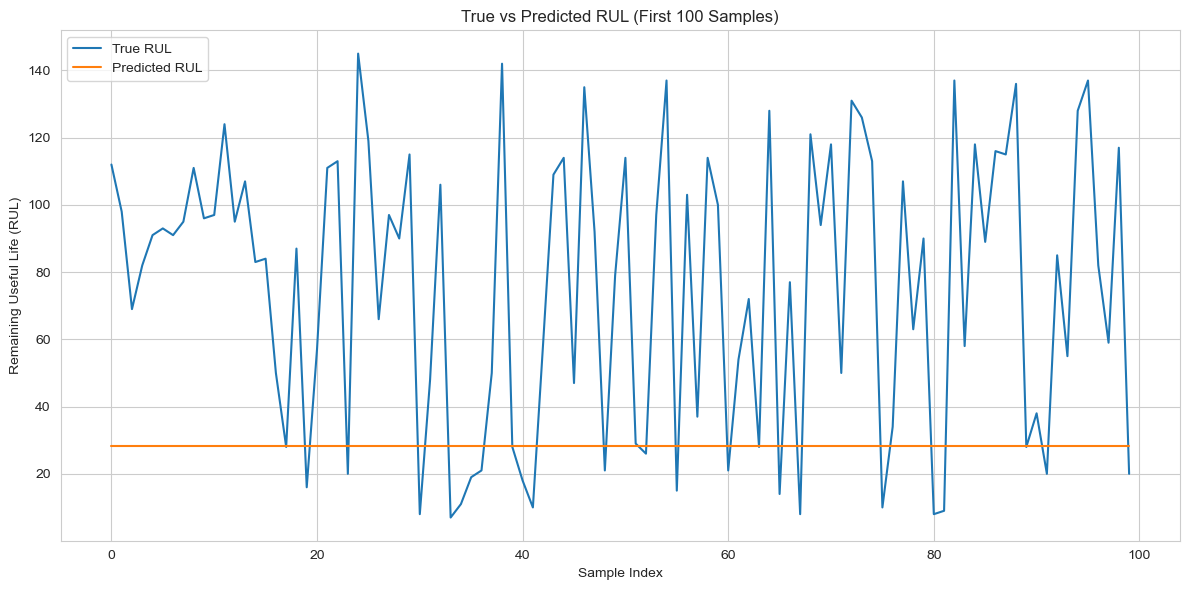

In [140]:
# 8. Visualize results
plt.figure(figsize=(12, 6))
plt.plot(y_test, label='True RUL')
plt.plot(predictions, label='Predicted RUL')
plt.xlabel('Sample Index')
plt.ylabel('Remaining Useful Life (RUL)')
plt.title('True vs Predicted RUL (First 100 Samples)')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

In [141]:
r2_square = r2_score(y_test, predictions)
r2_square

-1.2937313015046459

In [ ]:
model = joblib.load('xgb_model.p')

In [ ]:
model_rf = joblib.load('rf_model.pkl')

[📝Check List](#Check-List)